In [62]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Load in data

In [ ]:
root = r"07 Samsung UX Index - Web App Implementation/"

In [12]:
fname_data = root + r"Samsung UX Index Survey_Data.csv"
print (fname_data)

07 Samsung UX Index - Web App Implementation/Samsung UX Index Survey_Data.csv


In [230]:
df_data = pd.read_csv(fname_data)
print (df_data.shape) # confirmed using bash line & column count
df_data.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3254, 1257)


,respid,WEIGHT,d2,hidagemodels,qxcurrentxmodel,hbrand,hmodelquota,qxtime,qxoverallxqualityxindicators_1,qxoverallxqualityxindicators_2,...,front_camera_UXI,video_recording_UXI,photo_editing_UXI,sharing_UXI,location_services_UXI,tracking_wellbeing_UXI,using_notes_UXI,mobile_payment_UXI,digital_assistant_UXI,AR_shopping_UXI
0,104,0.661075,33,3,11,1,1,4,4,4,...,,,,,,,,,,
1,559,1.165587,34,3,11,1,1,3,6,4,...,51.94464476,40.81428023,,,36.52783675,48.22924468,48.82982401,44.44444444,55.8243483,55.18206502
2,807,0.651395,27,2,11,1,1,4,7,5,...,54.02745401,54.89281917,,,,,,12.35800669,,
3,816,1.678478,28,2,11,1,1,5,6,6,...,,,,25,25,,,,,
4,817,0.460022,36,3,11,1,1,2,6,7,...,100,75.8878279,75.8878279,49.35344909,100,,,,75.8878279,


## Explore Data vars

In [434]:
print([x for x in df_data.columns])

['respid', 'WEIGHT', 'd2', 'hidagemodels', 'qxcurrentxmodel', 'hbrand', 'hmodelquota', 'qxtime', 'qxoverallxqualityxindicators_1', 'qxoverallxqualityxindicators_2', 'qxoverallxqualityxindicators_3', 'qxoverallxqualityxindicators_4', 'qxactivitiesximportance_1', 'qxactivitiesximportance_2', 'qxactivitiesximportance_3', 'qxactivitiesximportance_4', 'qxactivitiesximportance_5', 'qxactivitiesximportance_6', 'qxactivitiesximportance_7', 'qxactivitiesximportance_8', 'qxactivitiesximportance_9', 'qxactivitiesximportance_10', 'qxactivitiesximportance_11', 'qxactivitiesximportance_12', 'qxactivitiesximportance_13', 'qxactivitiesximportance_14', 'qxactivitiesximportance_15', 'qxactivitiesximportance_16', 'qxactivitiesximportance_17', 'qxactivitiesximportance_18', 'qxactivitiesximportance_19', 'qxactivitiesximportance_20', 'qxactivitiesximportance_21', 'qxactivitiesximportance_22', 'qxactivitiesximportance_23', 'qxactivitiesximportance_24', 'qxactivitiesximportance_25', 'qxactivitiesxrecency_1', 

In [455]:
[x for x in df_data.columns if x.contains('UXindex')]

AttributeError: 'str' object has no attribute 'contains'

In [458]:
cols = ['WEIGHT', 'hidagemodels', 'd1', 'qxdrivers_19', 'speaker_phone_UXI', 'UX_Loyalty', 'UXindex']
addt = [ 'UXindex unweighted', 'UXindex weighted' ]
# df_data_wsub = df_data[cols]
df_data_wsub = df_data[cols]
df_data_wsub.head()
# df_data_wsub['UXindex unweighted']
# df_data_wsub['UXindex weighted' ]

,WEIGHT,hidagemodels,d1,qxdrivers_19,speaker_phone_UXI,UX_Loyalty,UXindex
0,0.661075,3,4,6,,4.000000,25.000000
1,1.165587,3,1,5,,4.833333,55.533422
2,0.651395,2,2,5,,5.333333,42.790773
3,1.678478,2,1,5,25,5.333333,69.444444
4,0.460022,3,2,7,,5.333333,85.704969


In [460]:
df_data_wsub.describe()

,WEIGHT,hidagemodels,d1,qxdrivers_19,UX_Loyalty,UXindex
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000
mean,1.004331,2.241549,1.682237,5.679471,5.879738,68.474290
std,0.843182,0.769888,0.487606,1.289687,1.032128,24.077777
min,0.030322,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.460022,2.000000,1.000000,5.000000,5.166667,50.236930
50%,0.910992,2.000000,2.000000,6.000000,6.000000,69.444444
75%,1.311854,3.000000,2.000000,7.000000,6.666667,90.559293
max,7.207765,3.000000,4.000000,7.000000,7.000000,100.000000


# Load in maps

In [21]:
fname_vaxmap = root + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_varmap.head()

,Variable,Label,Short Label,Type,Minimum,Maximum,Description
0,respid,RESPID,ID,integer,104.000000,7436.000000,"respid = integer (min: 104, max: 7436) - ID"
1,WEIGHT,Weight,weight,float,0.030322,7.207765,"WEIGHT = float (min: 0.030321847, max: 7.20776..."
2,d2,D2. What is your age?,age,integer,18.000000,38.000000,"d2 = integer (min: 18, max: 38) - age"
3,hidagemodels,hidagemodels. Age groups by models:,age group,integer,1.000000,3.000000,"hidagemodels = integer (min: 1, max: 3) - age ..."
4,qxcurrentxmodel,Q_Current_Model. Which smartphone model do you...,model,integer,11.000000,53.000000,"qxcurrentxmodel = integer (min: 11, max: 53) -..."


In [22]:
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)
df_valmap.head()

,key,id,Label
0,d2,1,1
1,d2,2,2
2,d2,3,3
3,d2,4,4
4,d2,5,5


# Demographics

In [29]:
print("Total number of unique respids %d" % df_data.respid.nunique())
print("respids range from  %d to %d" % (df_data.respid.min(), df_data.respid.max()))
print()
print("The above min & max values have been confirmed \nby the variable map description field for respid")

Total number of unique respids 3254
respids range from  104 to 7436

The above min & max values have been confirmed 
by the variable map description field for respid


### Define general use function for extracting 1-d demographic info

In [239]:
def demog_summ_1d (DF, VAR, LABEL, ROT=30):
#     LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
    df = DF.groupby([VAR])['respid'].count().to_frame().reset_index()
    df[VAR] =  pd.to_numeric(df[VAR], errors='coerce')
    df = df.merge(df_valmap[df_valmap.key==VAR],  
                         left_on=VAR, right_on="id", how='left')
    df = df [['Label',"respid"]]
    df.columns = [LABEL,"Count"]
    df['Prop'] = df['Count'].transform(lambda x: x/x.sum())
    print(df.plot.bar(x=LABEL, y='Count', rot=ROT))
    return(df)

### Gender d1

AxesSubplot(0.125,0.125;0.775x0.755)


,Gender,Count,Prop
0,Male,1063,0.326675
1,Female,2167,0.665950
2,Non-binary,19,0.005839
3,Would rather not say,5,0.001537


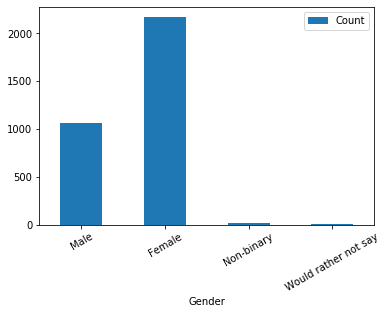

In [240]:
demog_summ_1d (df_data, "d1", "Gender")

### Age d2; generation cohort variable: hidagemodels

AxesSubplot(0.125,0.125;0.775x0.755)


,Age,Count,Prop
0,18,59,0.018132
1,19,109,0.033497
2,20,112,0.034419
3,21,126,0.038722
4,22,128,0.039336
5,23,132,0.040565
6,24,123,0.037800
7,25,125,0.038414
8,26,156,0.047941
9,27,167,0.051321


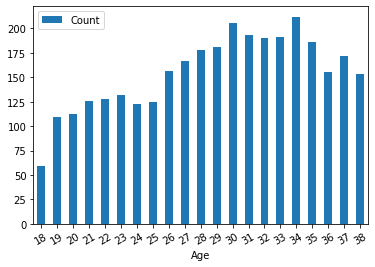

In [241]:
demog_summ_1d (df_data, "d2", "Age")

AxesSubplot(0.125,0.125;0.775x0.755)


,Generational Cohort,Count,Prop
0,Gen Z,666,0.204671
1,Younger millennials,1136,0.349109
2,Older millennials,1452,0.446220


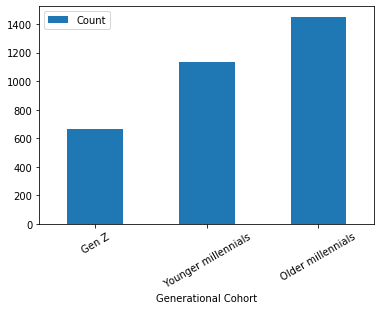

In [242]:
demog_summ_1d (df_data, "hidagemodels", "Generational Cohort")

### Employment status d3_1 to d3_4

AxesSubplot(0.125,0.125;0.775x0.755)


,Student (part-or full-time),Count,Prop
0,NaN,2602,0.799631
1,Student (part-or full-time),652,0.200369


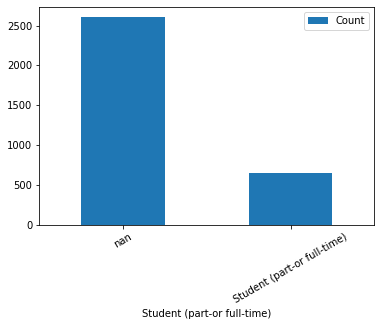

In [243]:
demog_summ_1d (df_data, "d3_1", "Student (part-or full-time)")

AxesSubplot(0.125,0.125;0.775x0.755)


,Employed,Count,Prop
0,NaN,1040,0.319607
1,Employed,2214,0.680393


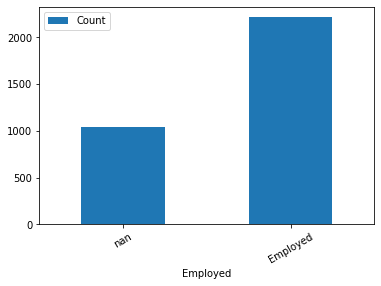

In [244]:
demog_summ_1d (df_data, "d3_2", "Employed")

AxesSubplot(0.125,0.125;0.775x0.755)


,Retired,Count,Prop
0,NaN,3200,0.983405
1,Retired or otherwise unable to work,54,0.016595


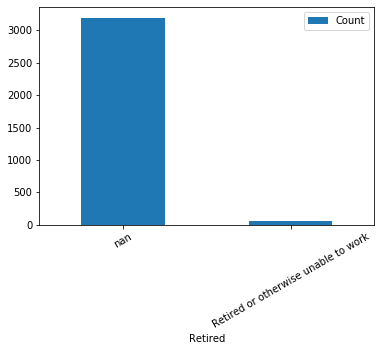

In [245]:
demog_summ_1d (df_data, "d3_3", "Retired")

AxesSubplot(0.125,0.125;0.775x0.755)


,Not employed or in school,Count,Prop
0,NaN,2797,0.859557
1,Not currently employed or in school,457,0.140443


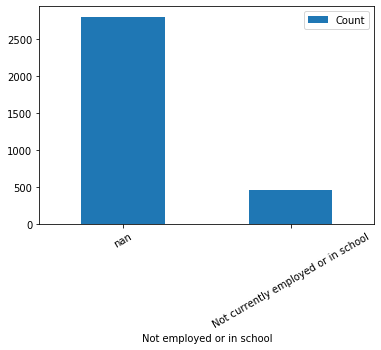

In [246]:
demog_summ_1d (df_data, "d3_4", "Not employed or in school")

### Education d4

AxesSubplot(0.125,0.125;0.775x0.755)


,Highest level of Ed,Count,Prop
0,Some high school or less,88,0.027044
1,High school graduate,505,0.155194
2,Some college – no degree,580,0.178242
3,2-year college/technical degree,388,0.119238
4,4-year college degree,1132,0.347880
5,Post-graduate degree,545,0.167486
6,Prefer not to answer,16,0.004917


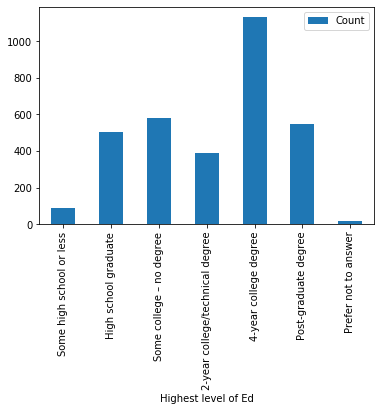

In [247]:
demog_summ_1d (df_data, "d4", "Highest level of Ed", 90)

### US state d5x1

AxesSubplot(0.125,0.125;0.775x0.755)


,State of Residence,Count,Prop
0,Alabama,57,0.017517
1,Alaska,10,0.003073
2,Arizona,71,0.021819
3,Arkansas,32,0.009834
4,California,372,0.114321
5,Colorado,58,0.017824
6,Connecticut,34,0.010449
7,Delaware,9,0.002766
8,District of Columbia,10,0.003073
9,Florida,210,0.064536


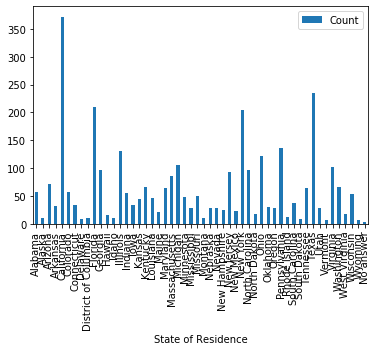

In [248]:
demog_summ_1d (df_data, "d5x1", "State of Residence", 90)

### Hispanic – yes/no d6

AxesSubplot(0.125,0.125;0.775x0.755)


,Hispanic,Count,Prop
0,NaN,172,0.052858
1,No,2570,0.789797
2,Yes,479,0.147203
3,Prefer not to say,33,0.010141


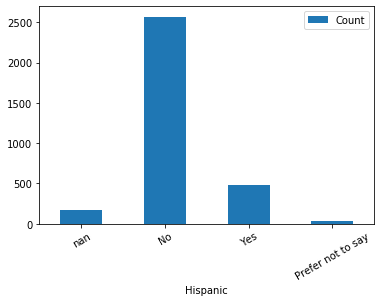

In [249]:
demog_summ_1d (df_data, "d6", "Hispanic")

### Race/ethnicity d7_1 to d7_99

AxesSubplot(0.125,0.125;0.775x0.755)


,White,Count,Prop
0,NaN,172,0.052858
1,NaN,808,0.248310
2,White,2274,0.698832


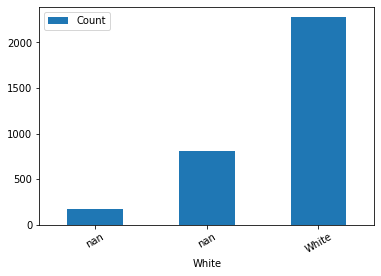

In [250]:
demog_summ_1d (df_data, "d7_1", "White")

AxesSubplot(0.125,0.125;0.775x0.755)


,Black,Count,Prop
0,NaN,172,0.052858
1,NaN,2691,0.826982
2,Black or African American,391,0.120160


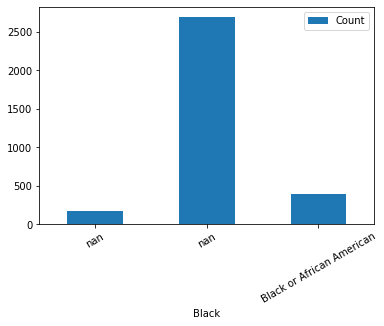

In [251]:
demog_summ_1d (df_data, "d7_2", "Black")

AxesSubplot(0.125,0.125;0.775x0.755)


,American Indian,Count,Prop
0,NaN,172,0.052858
1,NaN,3025,0.929625
2,American Indian or Alaska Native,57,0.017517


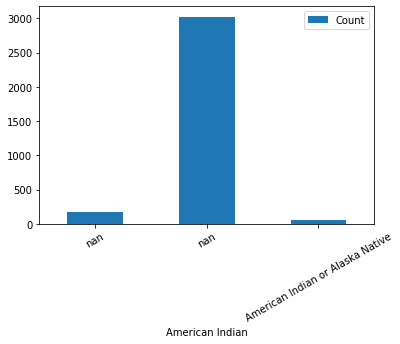

In [252]:
demog_summ_1d (df_data, "d7_3", "American Indian")

AxesSubplot(0.125,0.125;0.775x0.755)


,Asian,Count,Prop
0,NaN,172,0.052858
1,NaN,2787,0.856484
2,Asian or Asian American,295,0.090658


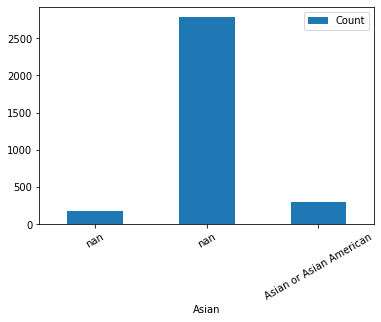

In [253]:
demog_summ_1d (df_data, "d7_4", "Asian")

AxesSubplot(0.125,0.125;0.775x0.755)


,Pacific Islander,Count,Prop
0,NaN,172,0.052858
1,NaN,3057,0.939459
2,Native Hawaiian or Pacific Islander,25,0.007683


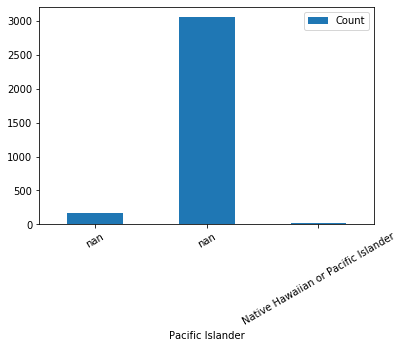

In [254]:
demog_summ_1d (df_data, "d7_5", "Pacific Islander")

AxesSubplot(0.125,0.125;0.775x0.755)


,Other Race,Count,Prop
0,NaN,172,0.052858
1,NaN,3003,0.922864
2,Another race,79,0.024278


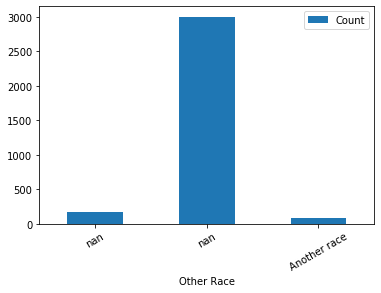

In [255]:
demog_summ_1d (df_data, "d7_97", "Other Race")

AxesSubplot(0.125,0.125;0.775x0.755)


,Race - prefer not to say,Count,Prop
0,NaN,172,0.052858
1,NaN,3014,0.926245
2,Prefer not to say,68,0.020897


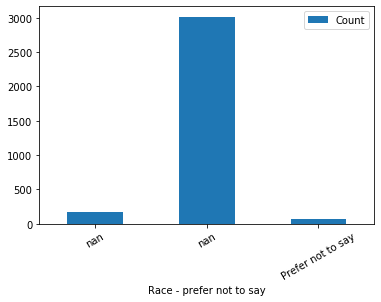

In [256]:
demog_summ_1d (df_data, "d7_99", "Race - prefer not to say")

### Empowered customer segment* Empowered_Customer_Groups

* Empowered Customer Segmentation is Forrester’s proprietary tool. The dataset already contains a variable that assigns each respondent to one on the 5 segments, but the
actual algorithm of creating the segments can’t be disclosed. 

AxesSubplot(0.125,0.125;0.775x0.755)


,Empowered_Customer_Groups,Count,Prop
0,Progressive Pioneers,1508,0.463430
1,Savvy Seekers,712,0.218808
2,Convenience Conformers,857,0.263368
3,Settled Survivors,64,0.019668
4,Reserved Resisters,113,0.034726


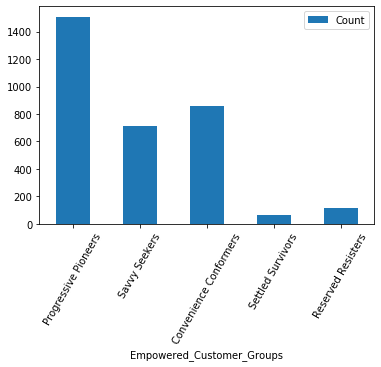

In [257]:
demog_summ_1d (df_data, "Empowered_Customer_Groups", "Empowered_Customer_Groups", 60)

# Cohorts
* We don’t analyze data by state/region, as regional differences likely wouldn’t be considered in the product development strategy.

## Main Cohorts
* enough sample to segment data further by brands

In [308]:
def demog_summ_2d (DF, VAR, LABEL, VAR2='hbrand', ROT=30):
#     LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
    df = DF.groupby([VAR, VAR2])['respid'].count().to_frame().reset_index()
    df[VAR] =  pd.to_numeric(df[VAR], errors='coerce')
    df[VAR2] =  pd.to_numeric(df[VAR2], errors='coerce')
    df = df.merge(df_valmap[df_valmap.key==VAR],  
          left_on=VAR, right_on="id", how='left').merge(df_valmap[df_valmap.key==VAR2],  
                         left_on=VAR2, right_on="id", how='left')
    df = df [['Label_x','Label_y',"respid"]]
    pivot_df = pd.pivot_table(df, index='Label_x', columns='Label_y', 
                              values="respid")
    prop_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

    print(pivot_df)
    print()
    print(prop_df)
    print(prop_df.plot.bar(stacked=True))
    
    return(df)


Label_y              Apple  Google   LG  Motorola  Samsung
Label_x                                                   
Gen Z                  294      61  148        60      103
Older millennials      537     233  144        47      491
Younger millennials    433     170  160        70      303

Label_y                 Apple    Google        LG  Motorola   Samsung
Label_x                                                              
Gen Z                0.441441  0.091592  0.222222  0.090090  0.154655
Older millennials    0.369835  0.160468  0.099174  0.032369  0.338154
Younger millennials  0.381162  0.149648  0.140845  0.061620  0.266725
AxesSubplot(0.125,0.125;0.775x0.755)


,Label_x,Label_y,respid
0,Gen Z,Samsung,103
1,Gen Z,Apple,294
2,Gen Z,LG,148
3,Gen Z,Google,61
4,Gen Z,Motorola,60
5,Younger millennials,Samsung,303
6,Younger millennials,Apple,433
7,Younger millennials,LG,160
8,Younger millennials,Google,170
9,Younger millennials,Motorola,70


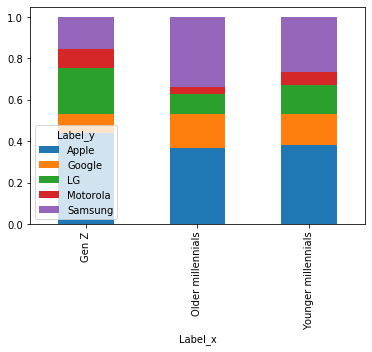

In [309]:
demog_summ_2d (df_data, "hidagemodels", "Generational Cohort")

Label_y               Apple  Google     LG  Motorola  Samsung
Label_x                                                      
Female                917.0   329.0  221.0      97.0    603.0
Male                  336.0   127.0  231.0      80.0    289.0
Non-binary             10.0     5.0    NaN       NaN      4.0
Would rather not say    1.0     3.0    NaN       NaN      1.0

Label_y                  Apple    Google        LG  Motorola   Samsung
Label_x                                                               
Female                0.423166  0.151823  0.101984  0.044762  0.278265
Male                  0.316087  0.119473  0.217310  0.075259  0.271872
Non-binary            0.526316  0.263158       NaN       NaN  0.210526
Would rather not say  0.200000  0.600000       NaN       NaN  0.200000
AxesSubplot(0.125,0.125;0.775x0.755)


,Label_x,Label_y,respid
0,Male,Samsung,289
1,Male,Apple,336
2,Male,LG,231
3,Male,Google,127
4,Male,Motorola,80
5,Female,Samsung,603
6,Female,Apple,917
7,Female,LG,221
8,Female,Google,329
9,Female,Motorola,97


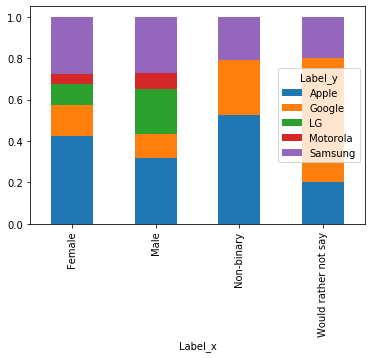

In [310]:
demog_summ_2d (df_data, "d1", "Gender")

Label_y            Apple  Google   LG  Motorola  Samsung
Label_x                                                 
No                  1001     412  328       123      706
Prefer not to say      6       4   10         9        4
Yes                  172      45  101        39      122

Label_y               Apple    Google        LG  Motorola   Samsung
Label_x                                                            
No                 0.389494  0.160311  0.127626  0.047860  0.274708
Prefer not to say  0.181818  0.121212  0.303030  0.272727  0.121212
Yes                0.359081  0.093946  0.210856  0.081420  0.254697
AxesSubplot(0.125,0.125;0.775x0.755)


,Label_x,Label_y,respid
0,NaN,Samsung,65
1,NaN,Apple,85
2,NaN,LG,13
3,NaN,Google,3
4,NaN,Motorola,6
5,No,Samsung,706
6,No,Apple,1001
7,No,LG,328
8,No,Google,412
9,No,Motorola,123


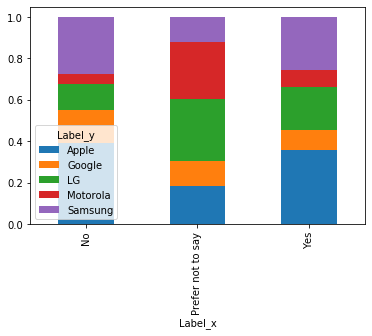

In [311]:
demog_summ_2d (df_data, "d6", "Hispanic")

## Additional Cohorts
* smaller base sizes; recommended to look at them at the Total level (not by brands)

In [ ]:
- Empowered Customer Segment:
• Progressive Pioneers
• Savvy Seekers
• Less Tech Savvy (combines Convenience Conformers, Settled
Survivors, and Reserved Resisters)

AxesSubplot(0.125,0.125;0.775x0.755)


,Empowered_Customer_Groups,Count,Prop
0,Progressive Pioneers,1508,0.463430
1,Savvy Seekers,712,0.218808
2,Convenience Conformers,857,0.263368
3,Settled Survivors,64,0.019668
4,Reserved Resisters,113,0.034726


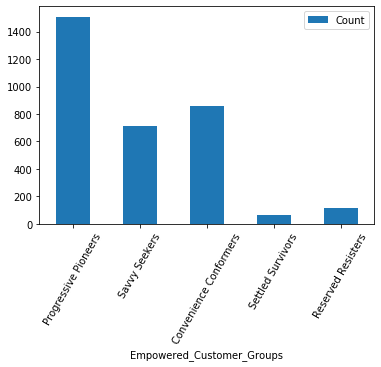

In [312]:
demog_summ_1d (df_data, "Empowered_Customer_Groups", "Empowered_Customer_Groups", 60)

In [ ]:
- Ethnicity/race:
• Caucasian/white
• Black or African American

AxesSubplot(0.125,0.125;0.775x0.755)


,White,Count,Prop
0,NaN,172,0.052858
1,NaN,808,0.248310
2,White,2274,0.698832


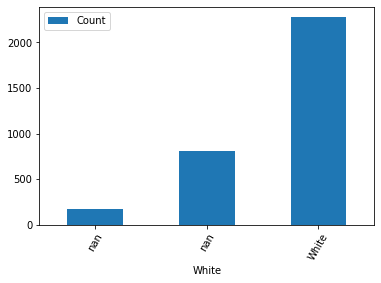

In [313]:
demog_summ_1d (df_data, "d7_1", "White", 60)

AxesSubplot(0.125,0.125;0.775x0.755)


,White,Count,Prop
0,NaN,172,0.052858
1,NaN,2691,0.826982
2,Black or African American,391,0.120160


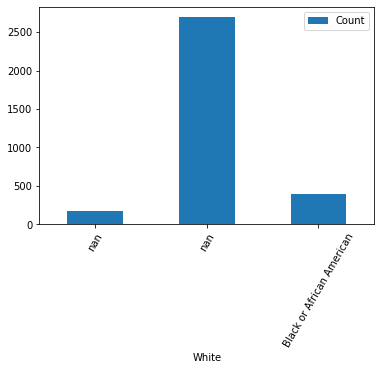

In [314]:
demog_summ_1d (df_data, "d7_2", "White", 60)

In [ ]:
- Employment Status: 
• Student
• Employed
• Retired or not employed

AxesSubplot(0.125,0.125;0.775x0.755)


,Student (part-or full-time),Count,Prop
0,NaN,2602,0.799631
1,Student (part-or full-time),652,0.200369


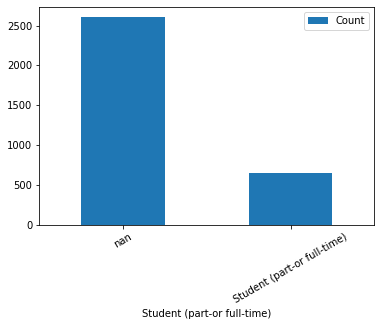

In [315]:
demog_summ_1d (df_data, "d3_1", "Student (part-or full-time)")

AxesSubplot(0.125,0.125;0.775x0.755)


,Student (part-or full-time),Count,Prop
0,NaN,1040,0.319607
1,Employed,2214,0.680393


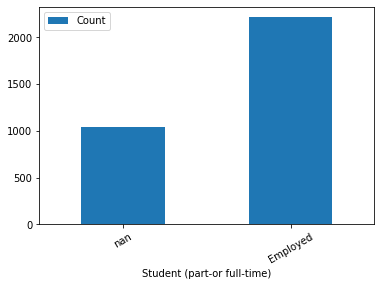

In [316]:
demog_summ_1d (df_data, "d3_2", "Student (part-or full-time)")

AxesSubplot(0.125,0.125;0.775x0.755)


,Student (part-or full-time),Count,Prop
0,NaN,3200,0.983405
1,Retired or otherwise unable to work,54,0.016595


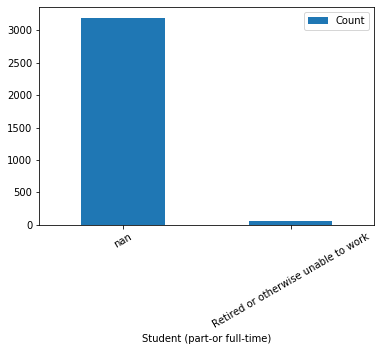

In [317]:
demog_summ_1d (df_data, "d3_3", "Student (part-or full-time)")

## More granular view:

In [ ]:
- Females under 35 / females 35+

In [326]:
df_data[['d1','d2']].head()

,d1,d2
0,4,33
1,1,34
2,2,27
3,1,28
4,2,36


In [342]:
df_data['35+/- Age Group'] = pd.Series(pd.cut(df_data['d2'], [18,35,39], 
                                            right=False))

Label            Apple  Google   LG  Motorola  Samsung
35+/- Age Group                                       
[18, 35)           744     252  195        83      443
[35, 39)           173      77   26        14      160

Label               Apple    Google        LG  Motorola   Samsung
35+/- Age Group                                                  
[18, 35)         0.433314  0.146768  0.113570  0.048340  0.258008
[35, 39)         0.384444  0.171111  0.057778  0.031111  0.355556
AxesSubplot(0.125,0.125;0.775x0.755)


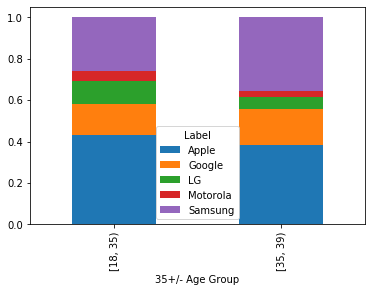

In [355]:
df = df_data[df_data['d1']==2].groupby(['35+/- Age Group', 'hbrand'])['respid'].count().to_frame().reset_index()
df['hbrand'] =  pd.to_numeric(df['hbrand'], errors='coerce')
df = df.merge(df_valmap[df_valmap.key=='hbrand'],  
                      left_on='hbrand', right_on="id", how='left')
df = df [['Label','35+/- Age Group',"respid"]]
pivot_df = pd.pivot_table(df, index='35+/- Age Group', columns='Label', 
                          values="respid")
prop_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

print(pivot_df)
print()
print(prop_df)
print(prop_df.plot.bar(stacked=True))

# Usage Variables

### Tenure with the current smartphone mode qxtime

AxesSubplot(0.125,0.125;0.775x0.755)


,Q_Time. How long have you been using your [MODEL]?,Count,Prop
0,Less than a month,105,0.032268
1,More than 1 month to 3 months,394,0.121082
2,More than 3 months to 6 months,617,0.189613
3,More than 6 months to 1 year,766,0.235403
4,More than 1 year to 2 years,874,0.268593
5,More than 2 years to 3 years,367,0.112784
6,More than 3 years,131,0.040258


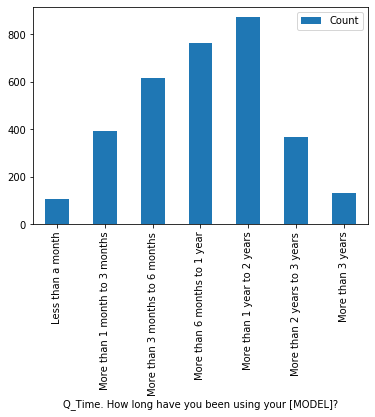

In [360]:
VAR = "qxtime"
LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
demog_summ_1d (df_data, VAR, LABEL, 90)

### Recency of doing tasks 
qxactivitiesxrecency_1 to qxactivitiesxrecency_25

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


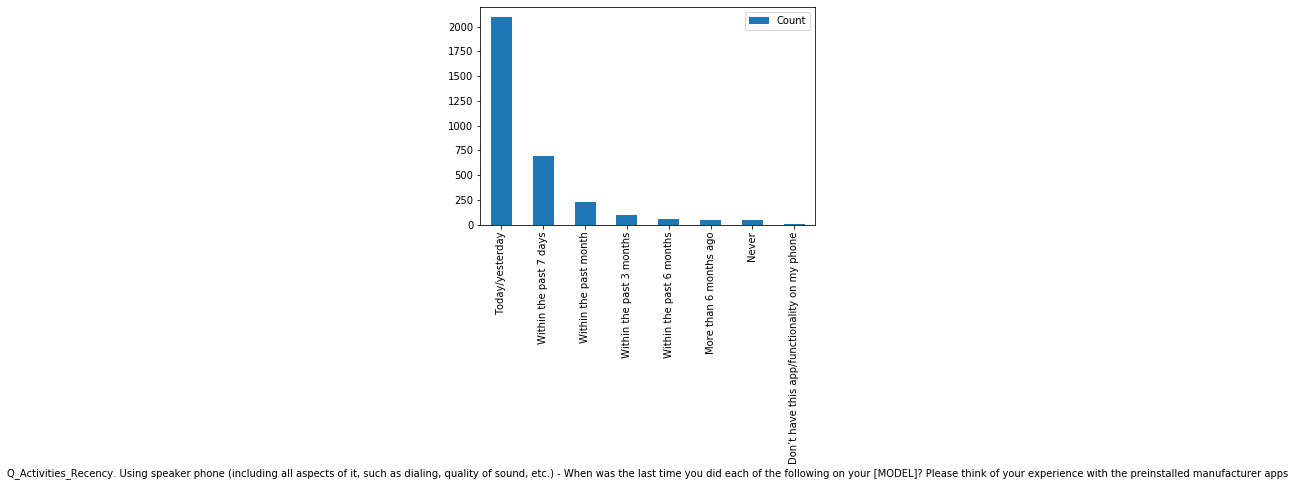

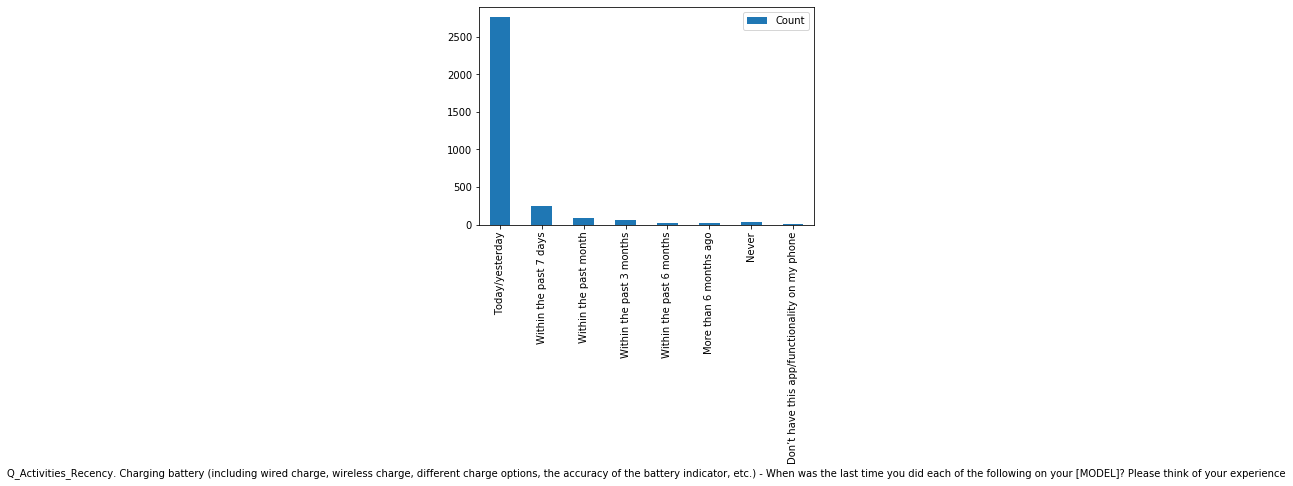

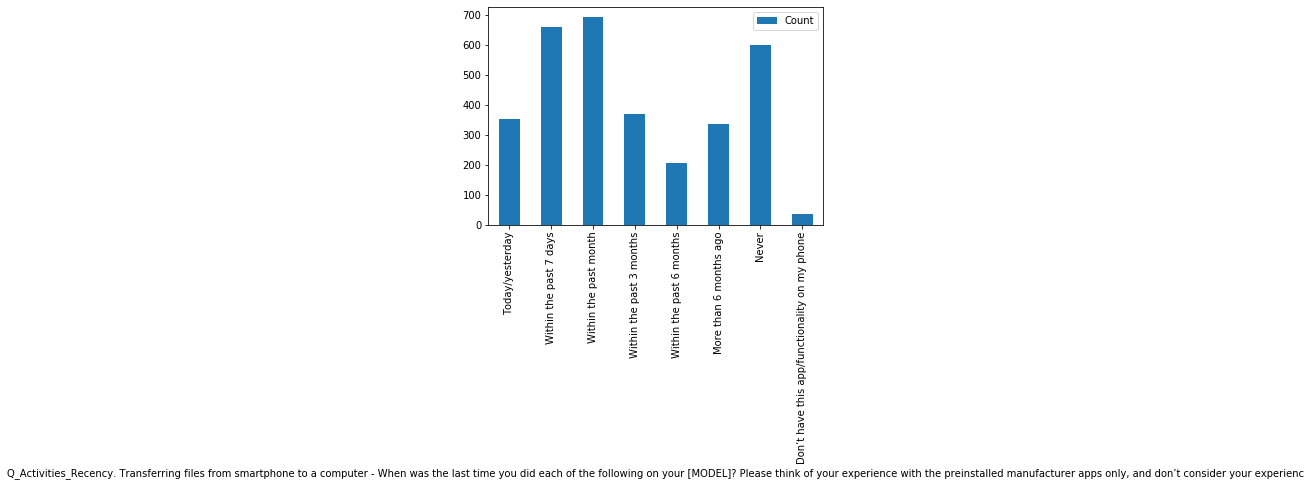

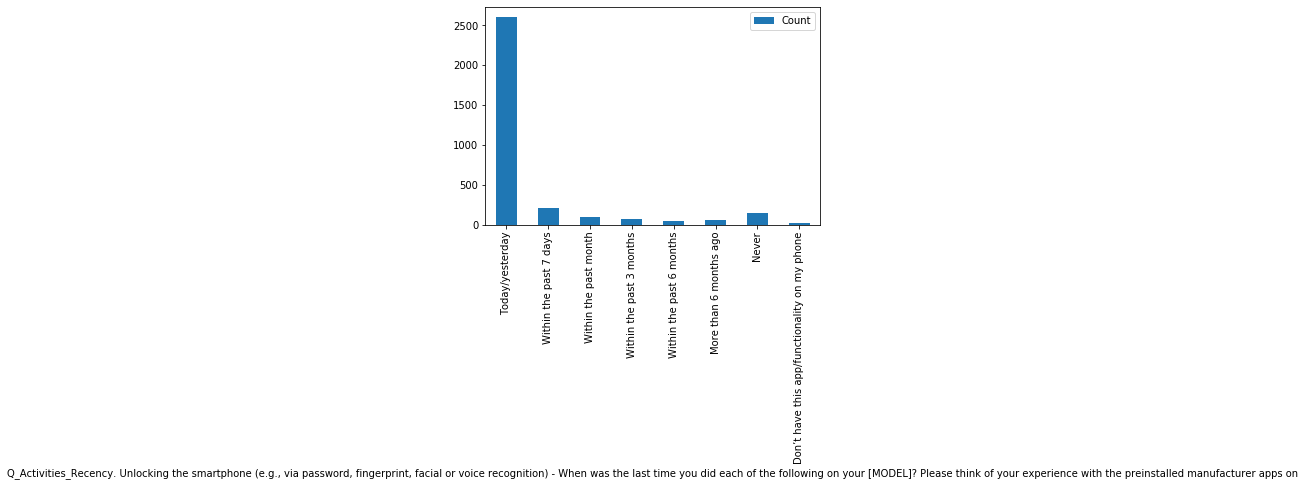

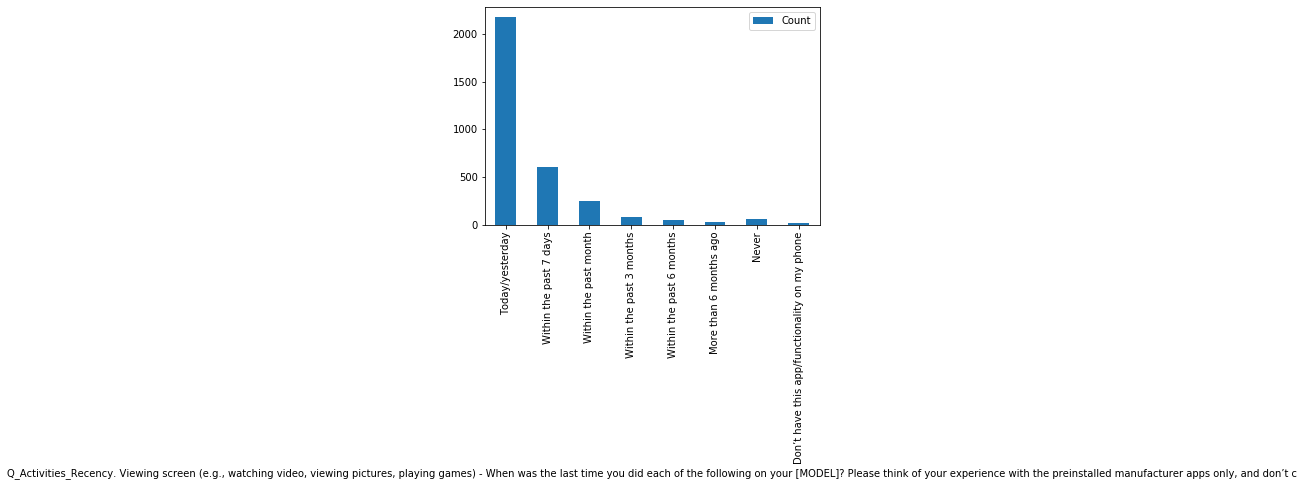

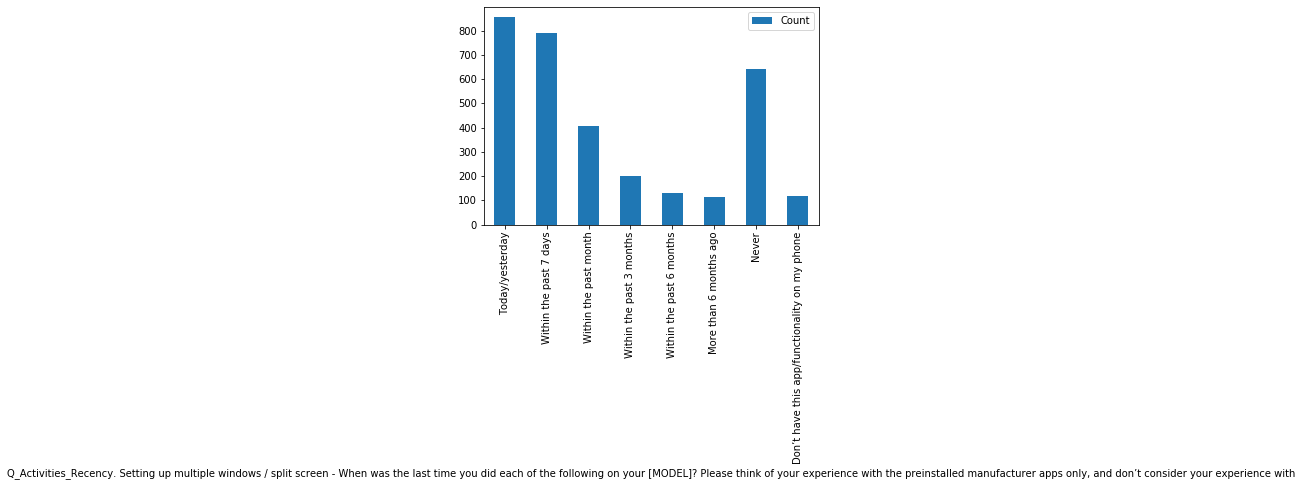

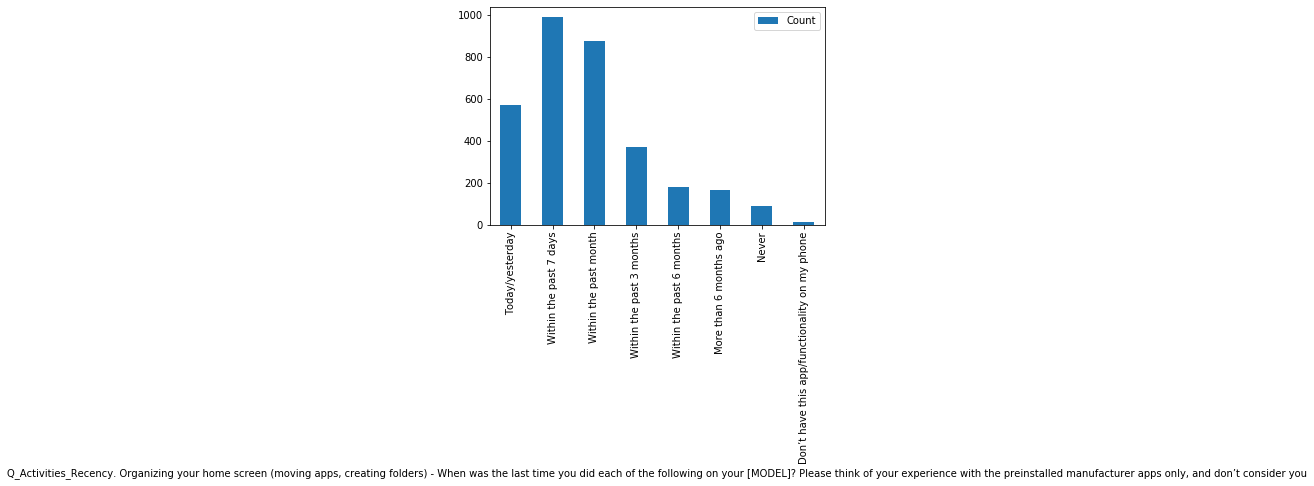

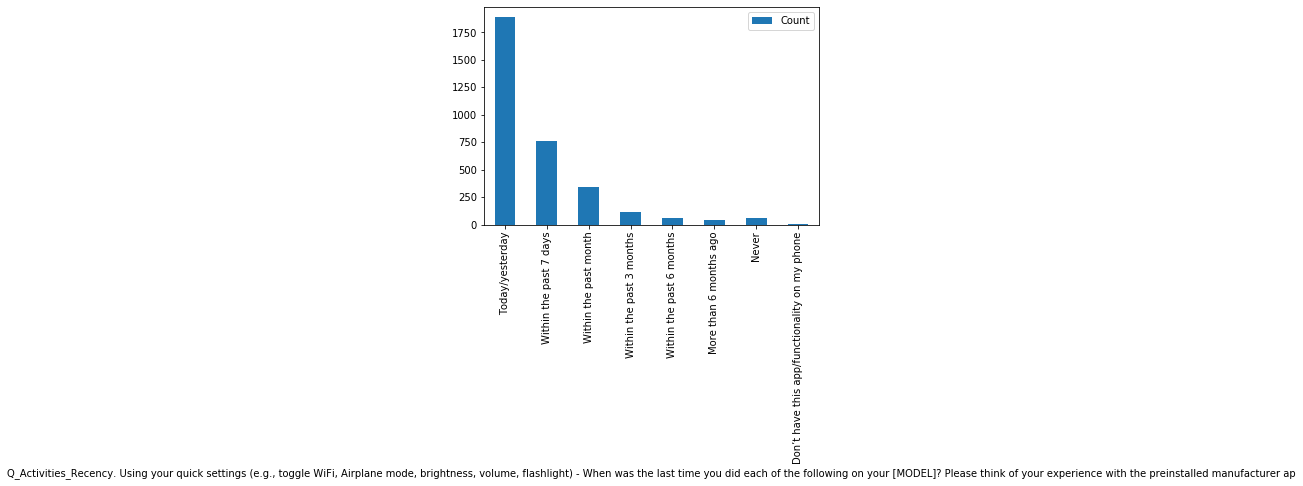

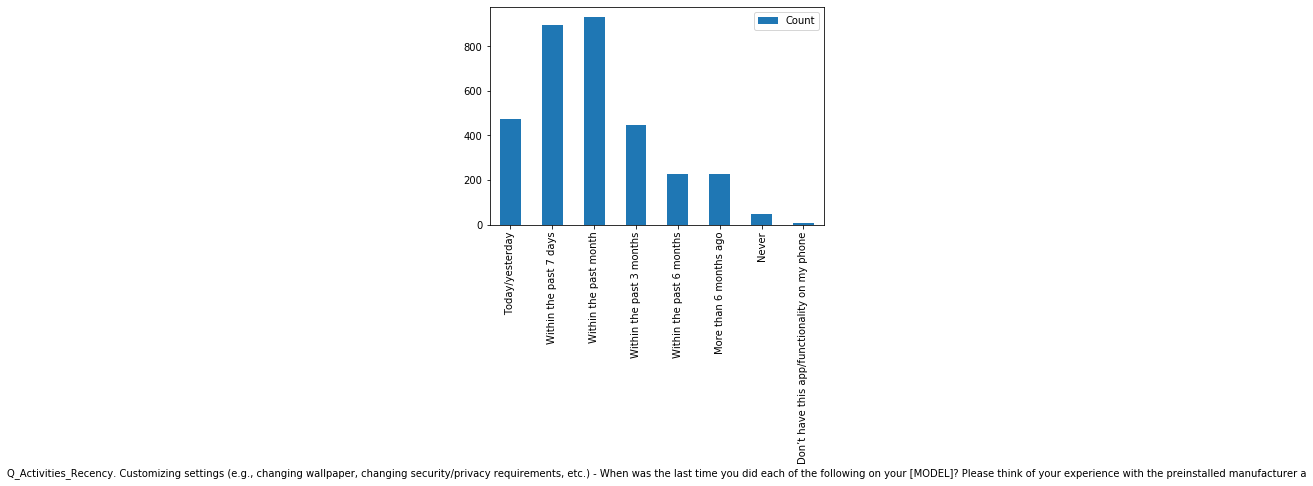

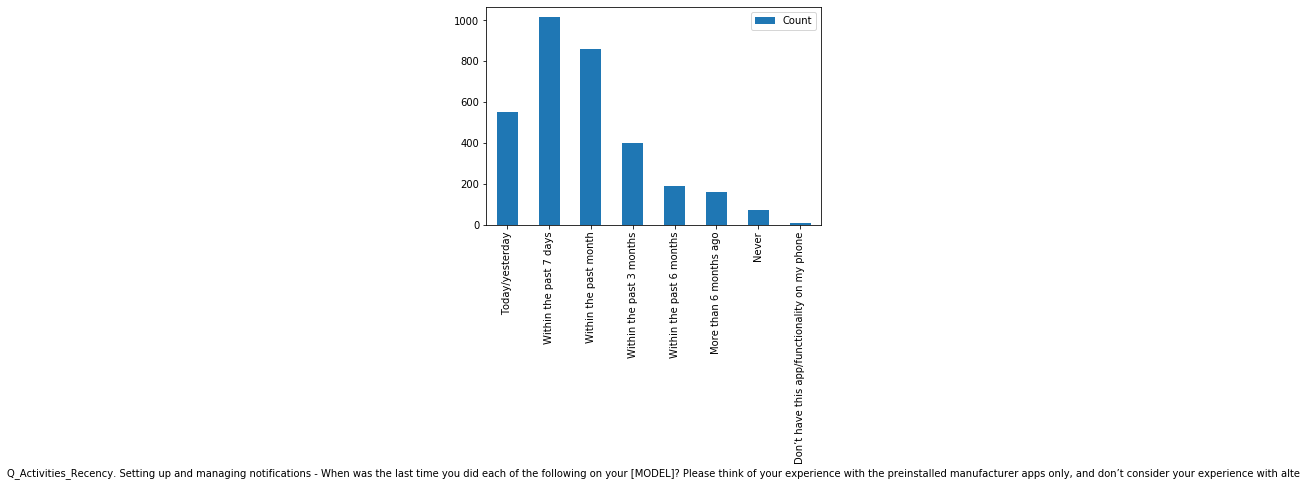

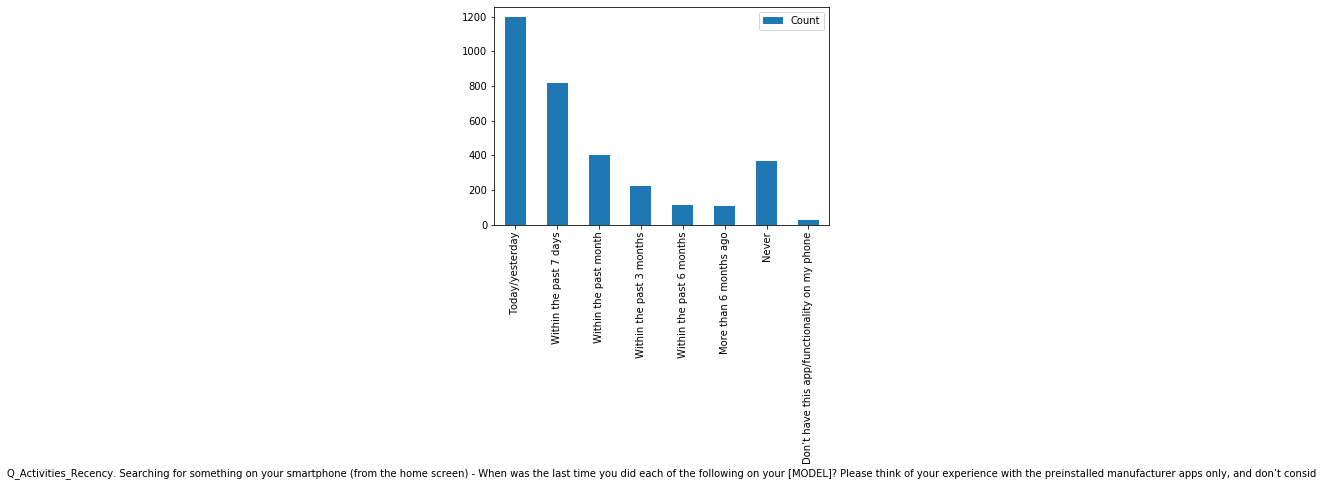

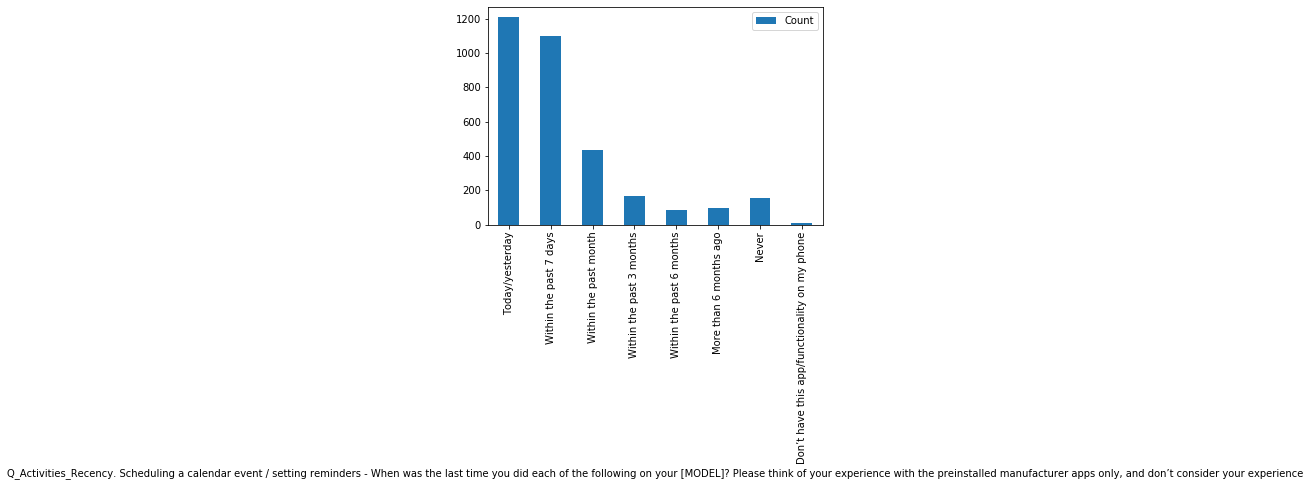

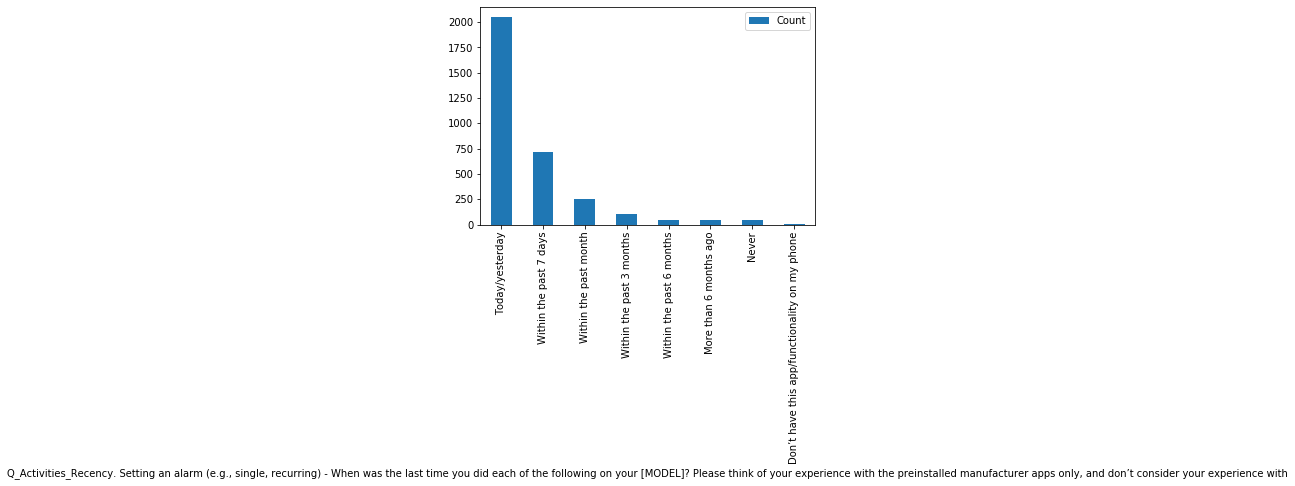

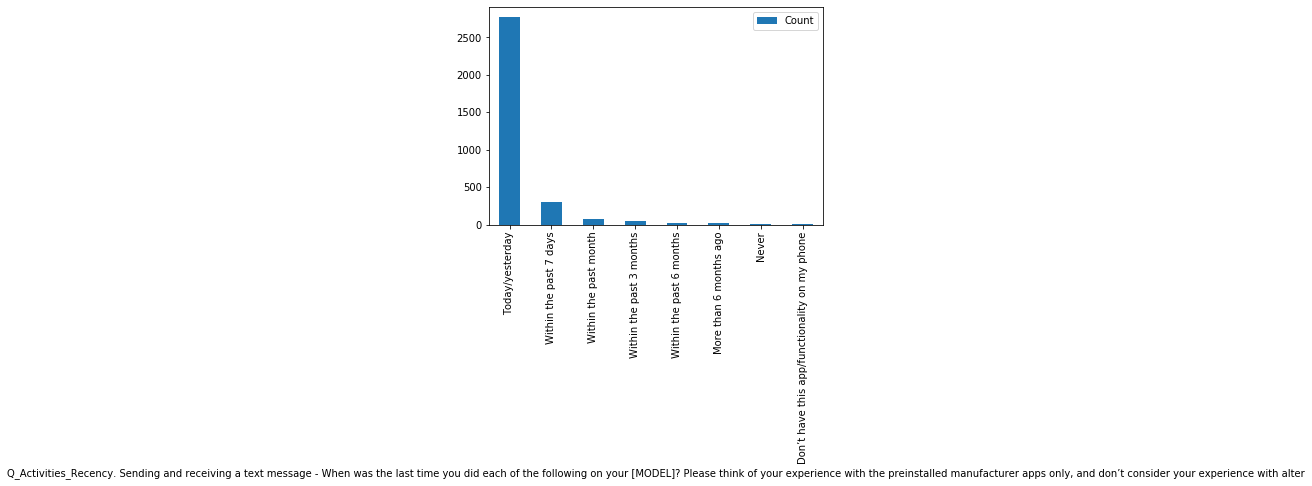

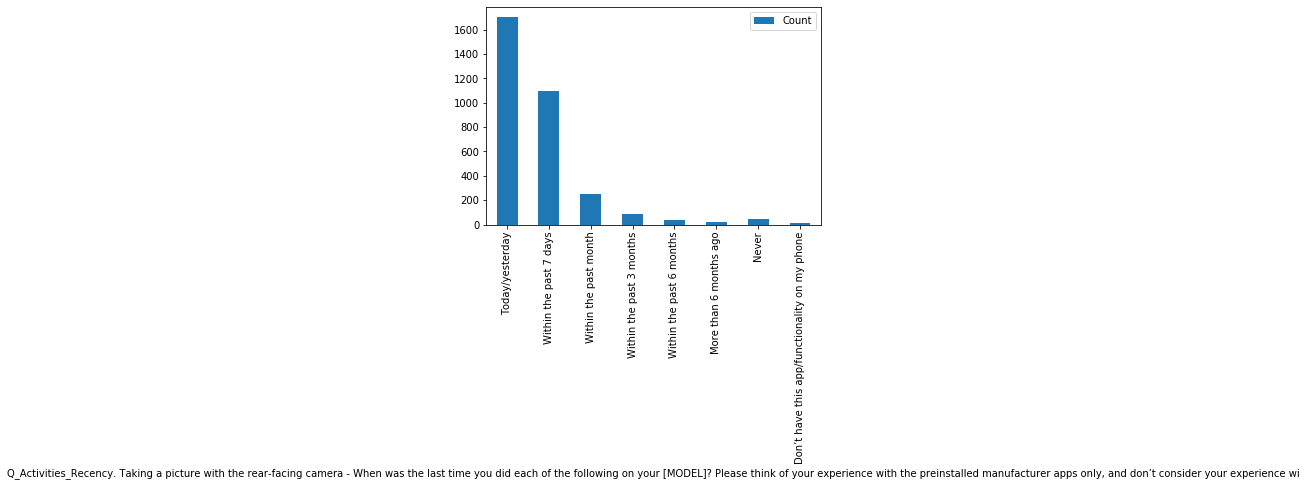

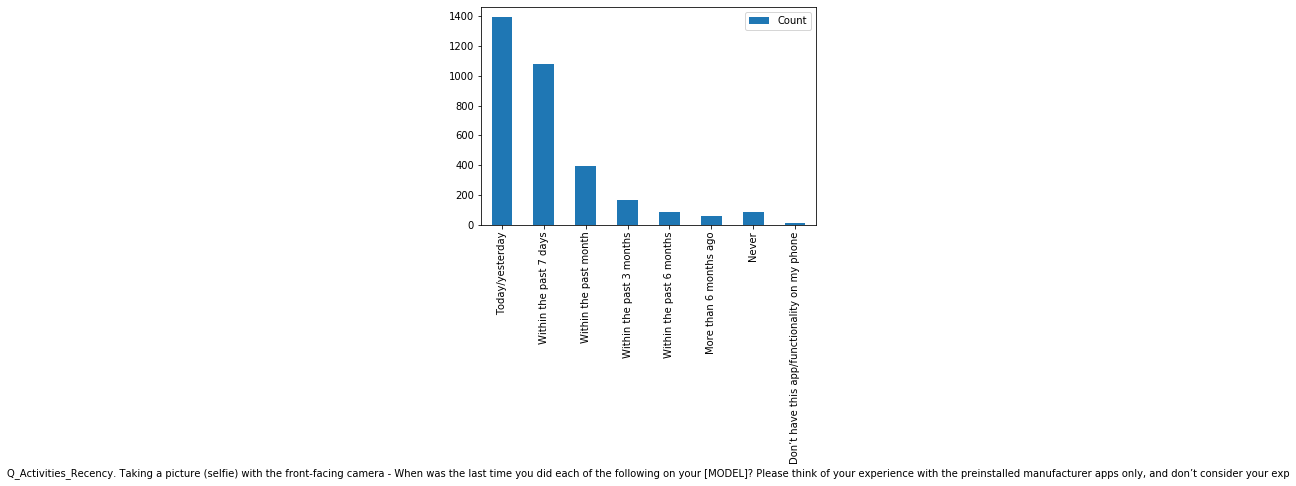

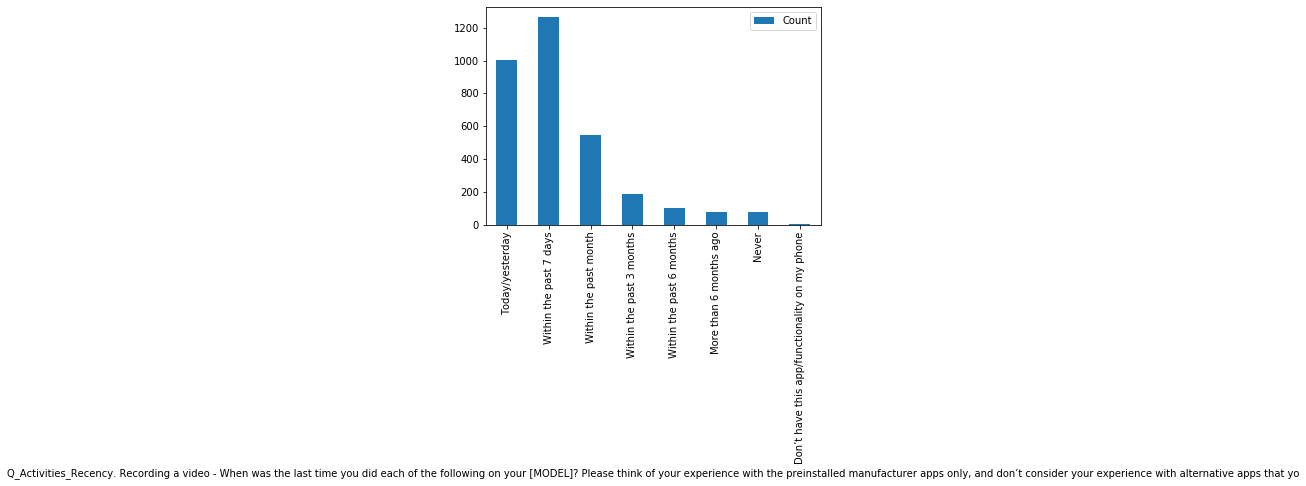

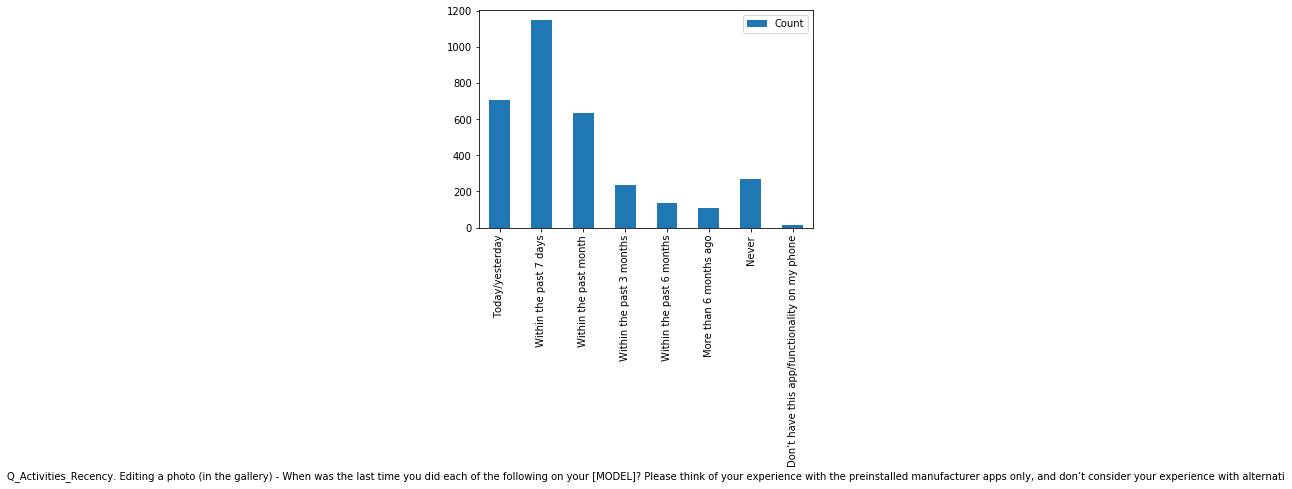

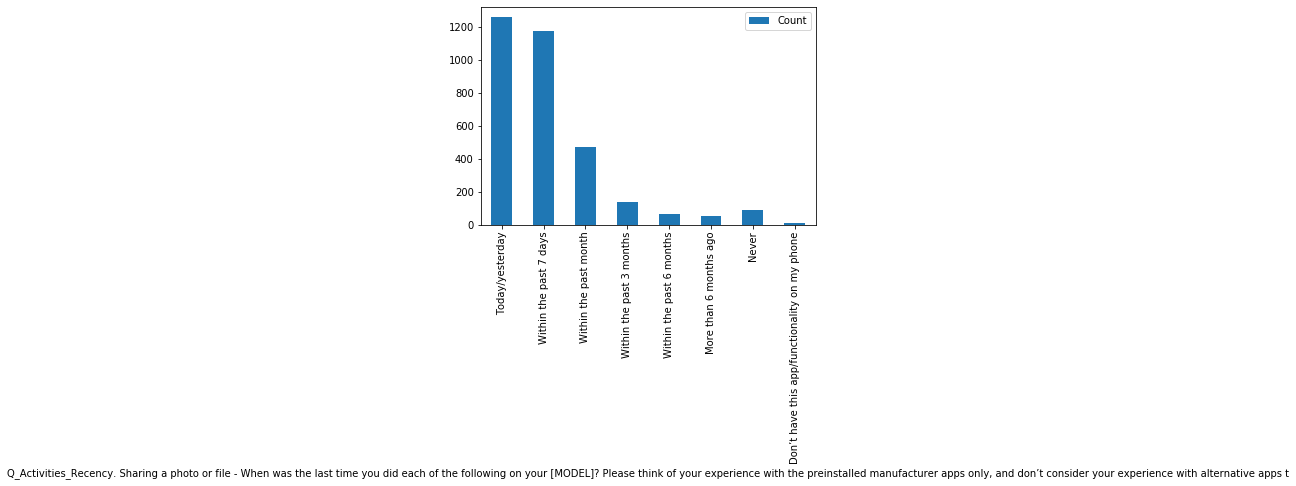

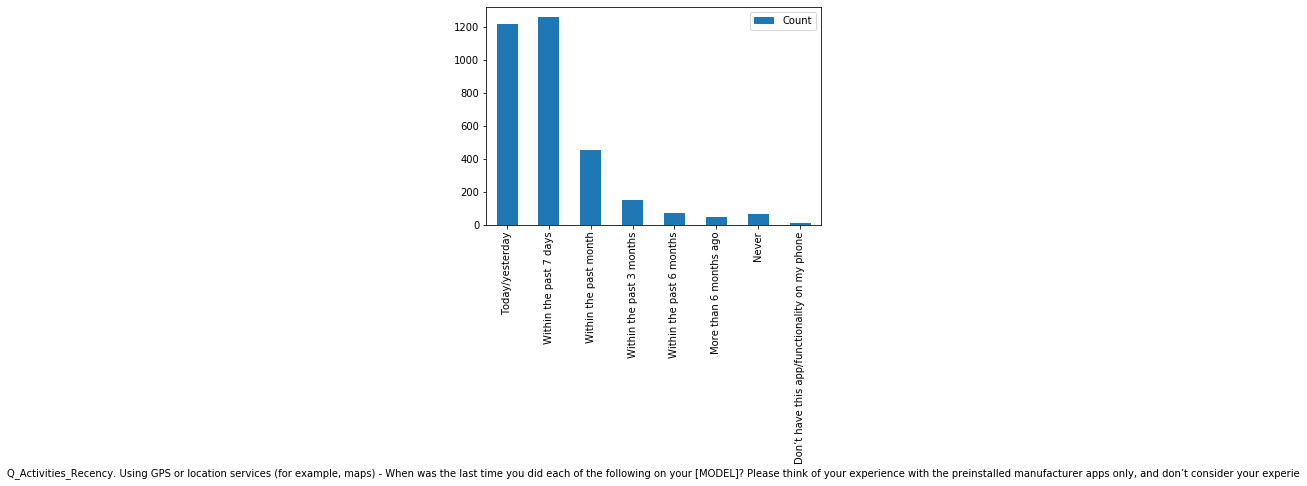

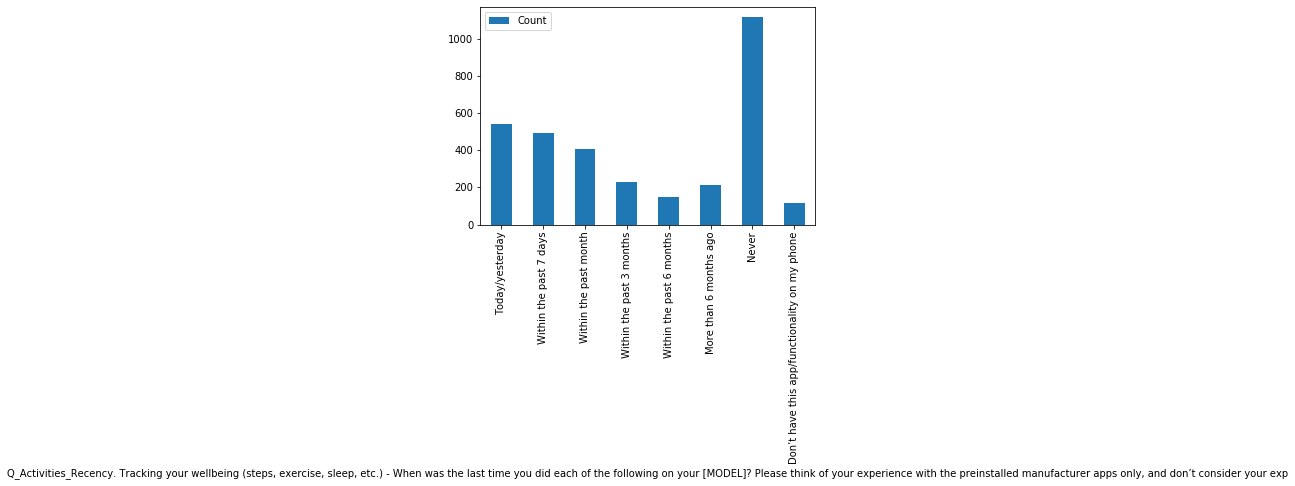

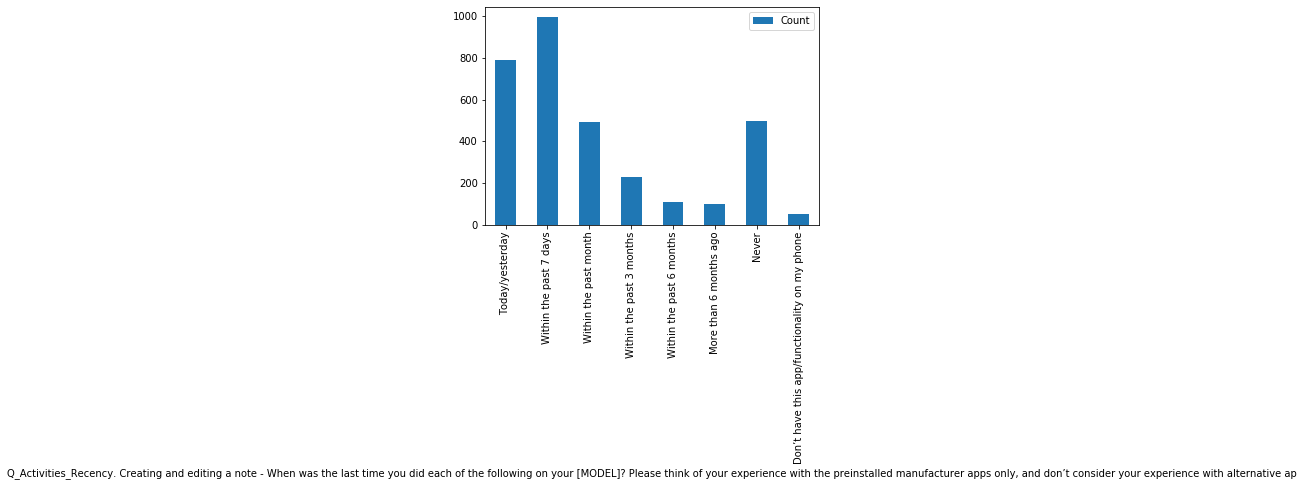

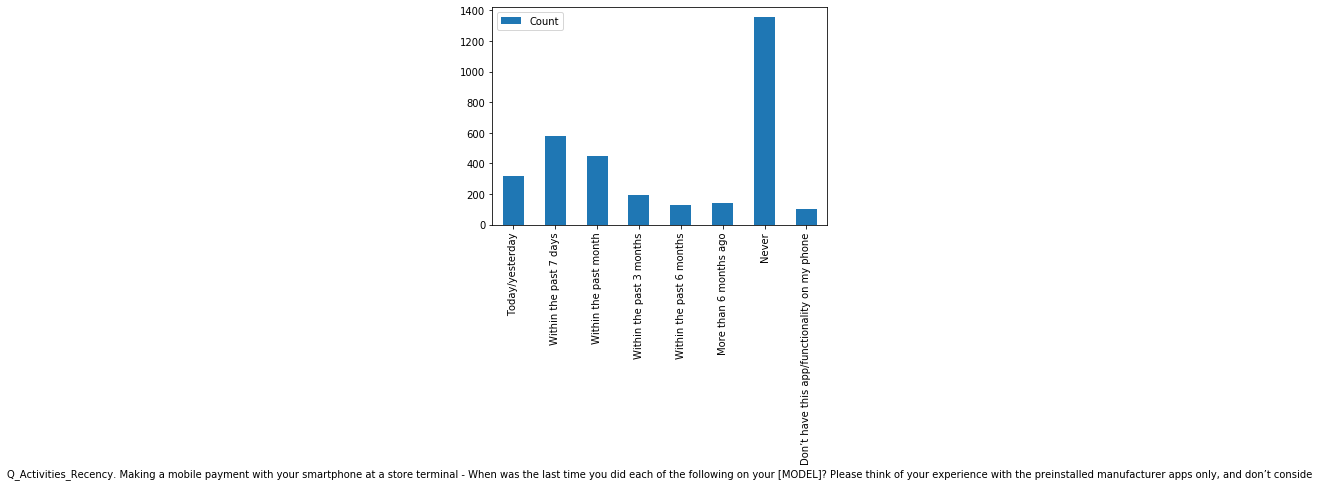

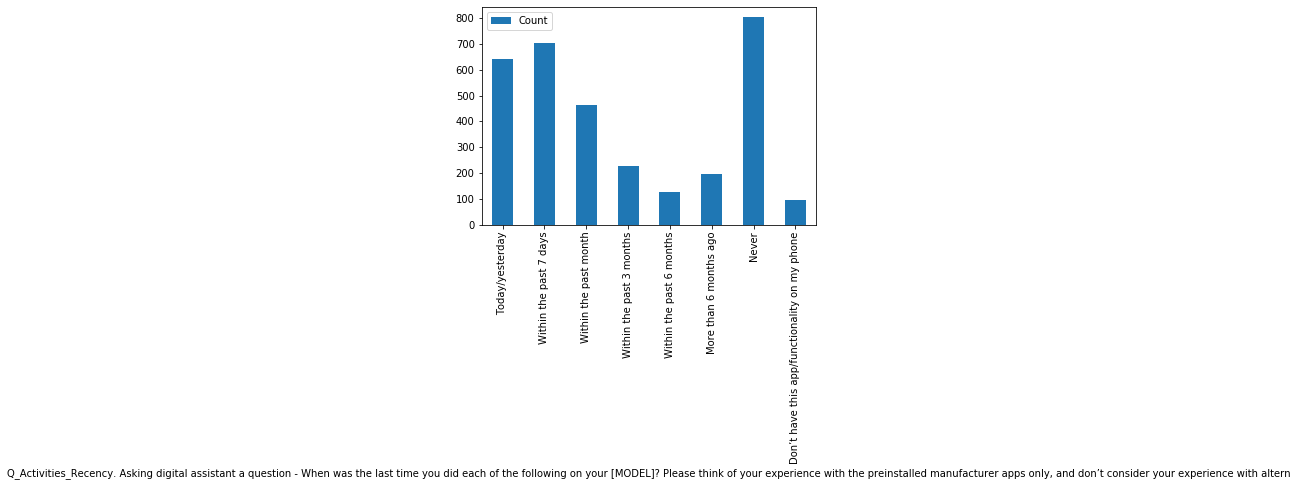

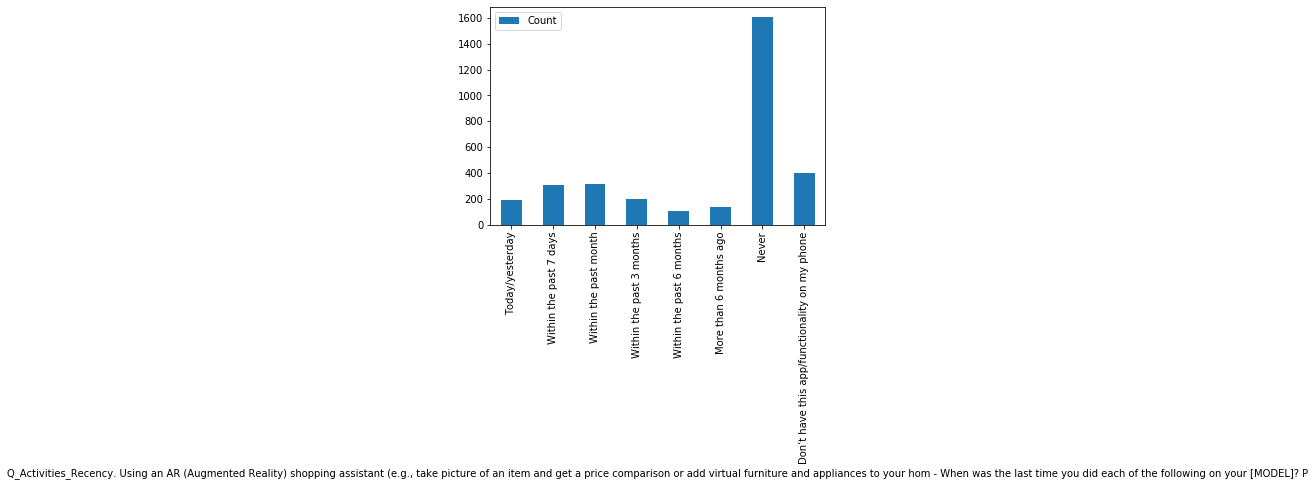

In [385]:
for VAR in ['qxactivitiesxrecency_'+str(x) for x in range(1,26)]:
    LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
    demog_summ_1d (df_data, VAR, LABEL, 90)

### Current OS
qxcurrentxos

AxesSubplot(0.125,0.125;0.775x0.755)


,"Q_Current_OS. Which version of [SHOW IF BRAND=APPLE: iOS; SHOW IF BRAND = SAMSUNG, LG, MOTOROLA, GOOGLE: Android] are you currently using on your smartphone? If you are not sure, you can check this in your settings.",Count,Prop
0,Android 7.0,103,0.031653
1,Android 7.1,123,0.037800
2,Android 8.0,314,0.096497
3,Android 8.1,326,0.100184
4,Android 9.0,702,0.215734
5,iOS 10,110,0.033805
6,iOS 11,166,0.051014
7,iOS 12,745,0.228949
8,Other (specify),19,0.005839
9,Don’t know,646,0.198525


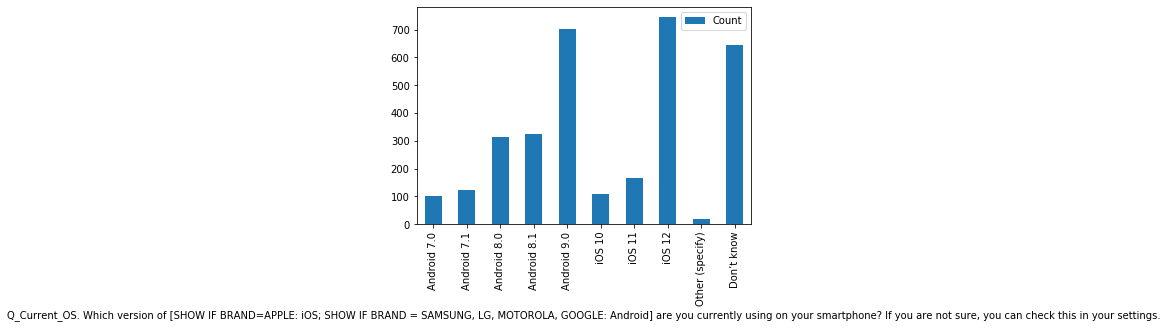

In [367]:
VAR = "qxcurrentxos"
LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
demog_summ_1d (df_data, VAR, LABEL, 90)

In [ ]:
Current model’s storage capacity
qxcurrentxstorage

AxesSubplot(0.125,0.125;0.775x0.755)


,"Q_Current_Storage. What is your [MODEL]’s storage capacity? Please specify the internal storage only, do not include the external storage on SD card.",Count,Prop
0,16 GB,290,0.089121
1,32 GB,735,0.225876
2,64 GB,1135,0.348801
3,128 GB,504,0.154886
4,256 GB,148,0.045482
5,512 GB,54,0.016595
6,Don’t know,388,0.119238


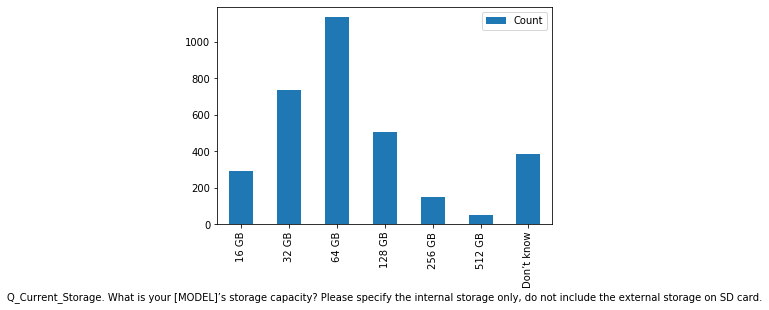

In [368]:
VAR = "qxcurrentxstorage"
LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
demog_summ_1d (df_data, VAR, LABEL, 90)

In [ ]:
Mobile carrier
qxcurrentxcarrier

AxesSubplot(0.125,0.125;0.775x0.755)


,Q_Current_Carrier. Which mobile carrier do you use on your [MODEL]?,Count,Prop
0,AT&T,779,0.239398
1,Sprint,386,0.118623
2,T-Mobile,614,0.188691
3,Verizon,1136,0.349109
4,Other (specify),339,0.104179


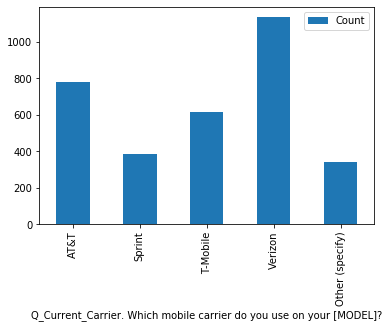

In [369]:
VAR = "qxcurrentxcarrier"
LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
demog_summ_1d (df_data, VAR, LABEL, 90)

In [ ]:
Current method of unlocking
qxunlocking

AxesSubplot(0.125,0.125;0.775x0.755)


,Q_Unlocking. Which method do you currently use to unlock your [MODEL]?,Count,Prop
0,Password,349,0.107253
1,Pass code,447,0.137369
2,Pattern,268,0.082360
3,Fingerprint,1436,0.441303
4,Face recognition,409,0.125691
5,Voice recognition,8,0.002459
6,Smart Lock,30,0.009219
7,Other,16,0.004917
8,I don’t need to unlock it (my screen lock is t...,291,0.089428


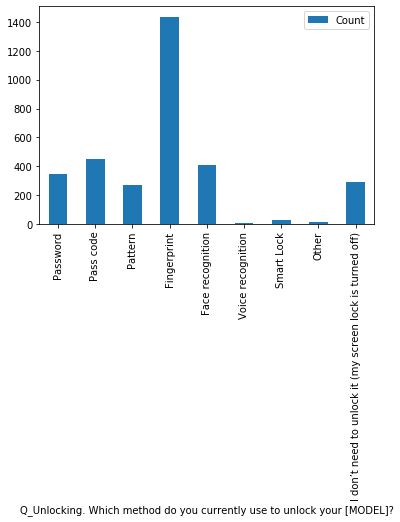

In [370]:
VAR = "qxunlocking"
LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
demog_summ_1d (df_data, VAR, LABEL, 90)

In [ ]:
Brands of other devices owned
qxotherxdevices_1_1 to qxotherxdevices_9_6

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
A

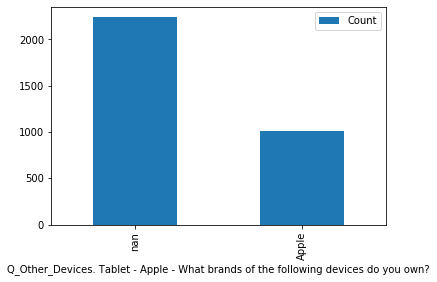

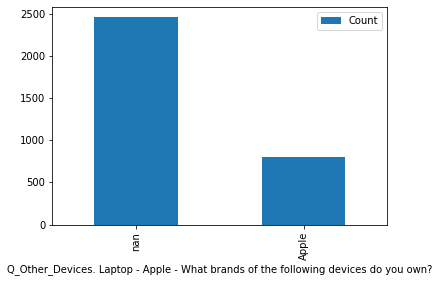

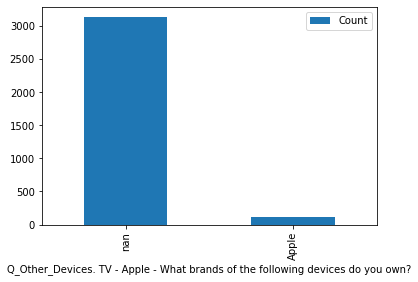

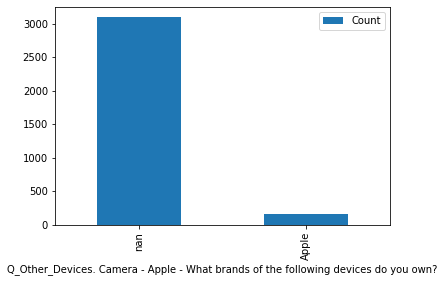

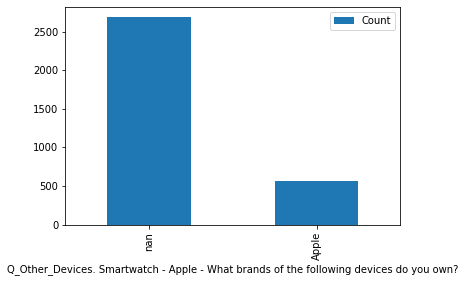

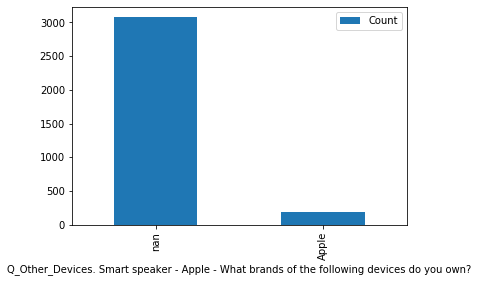

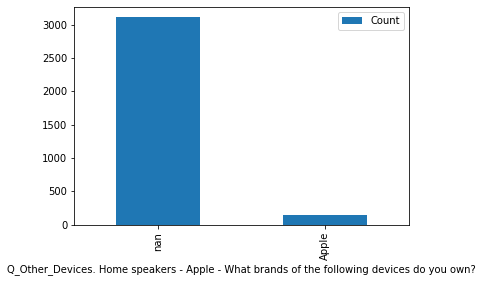

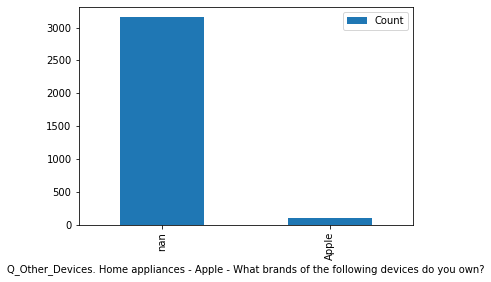

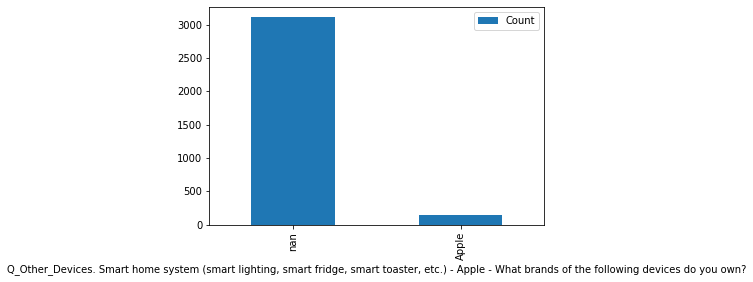

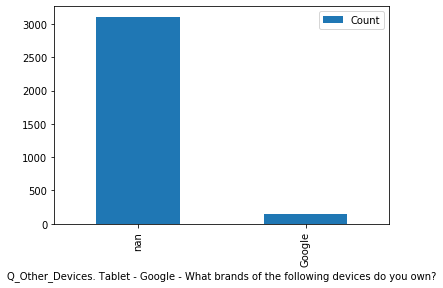

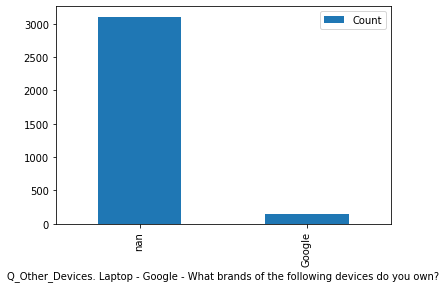

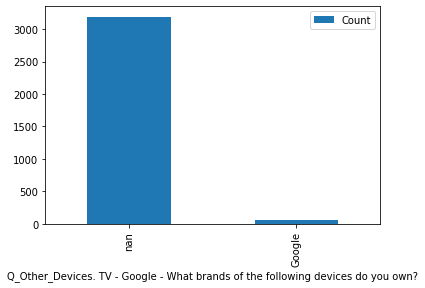

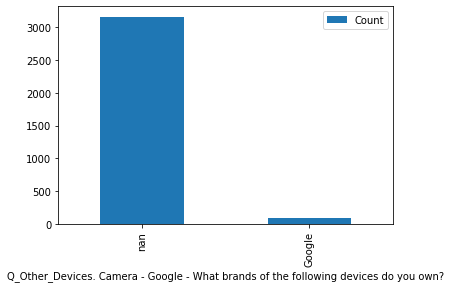

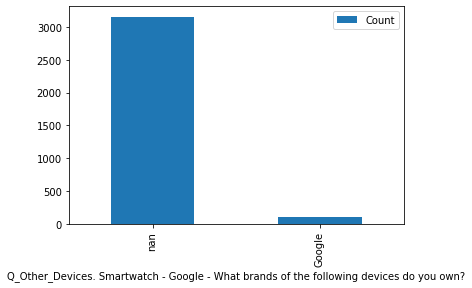

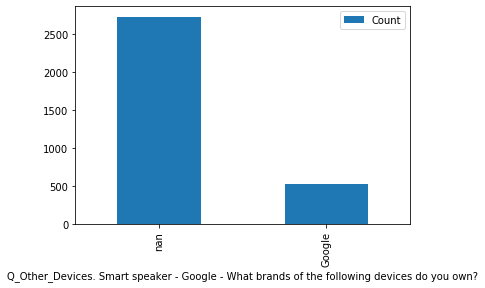

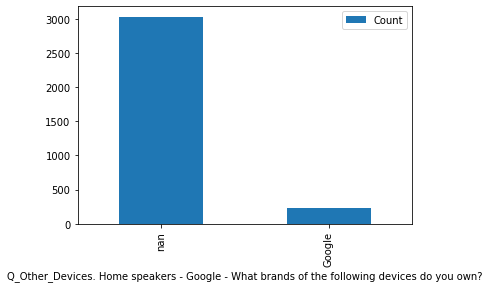

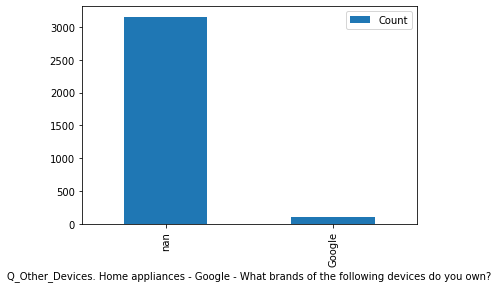

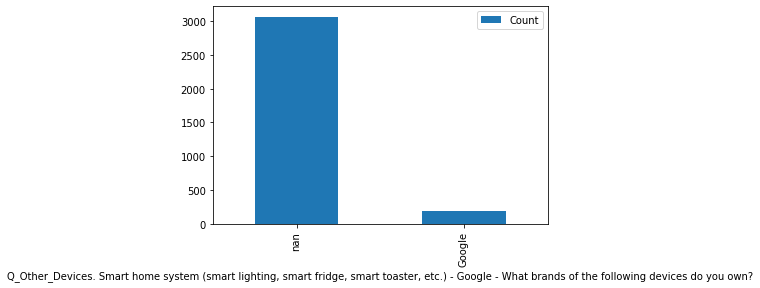

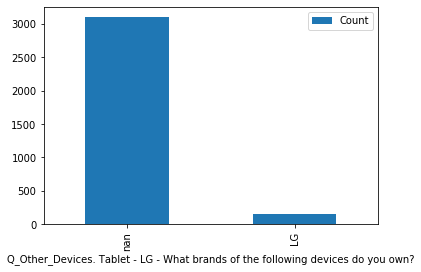

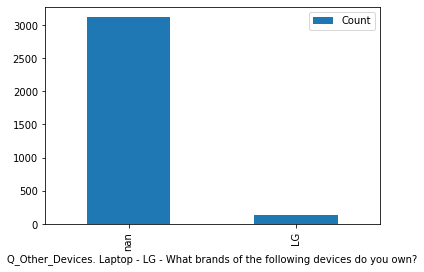

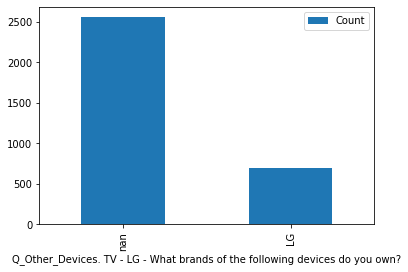

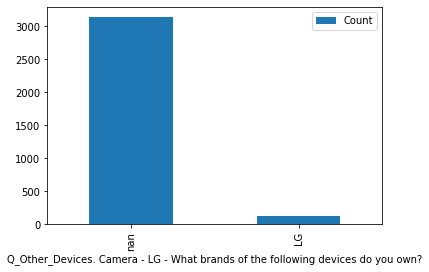

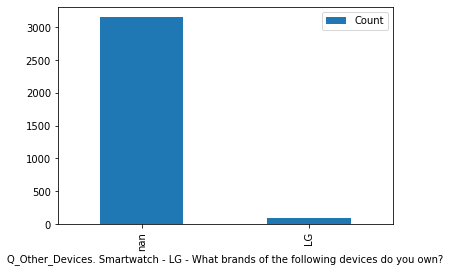

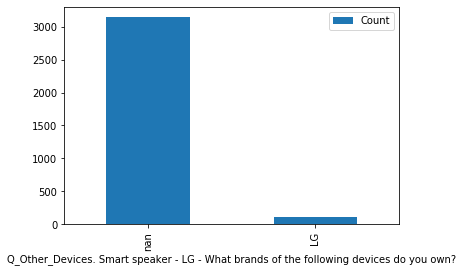

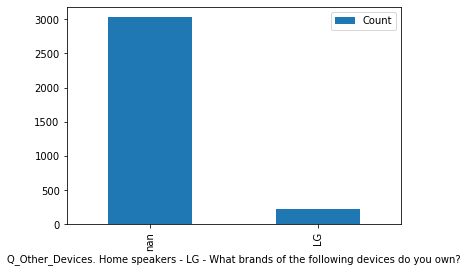

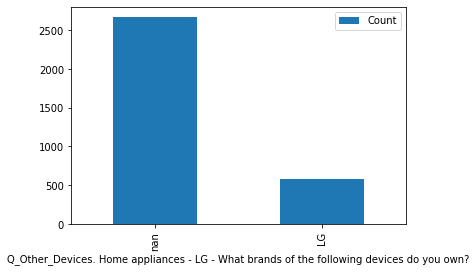

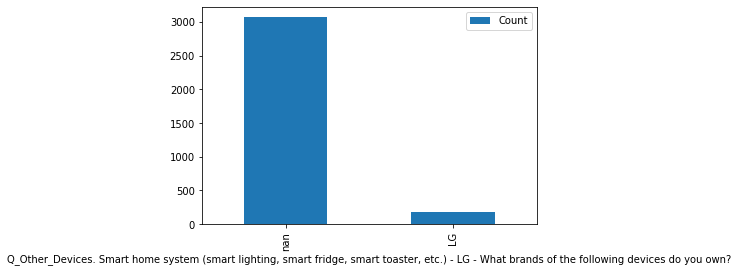

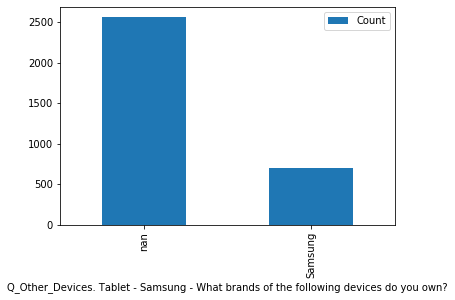

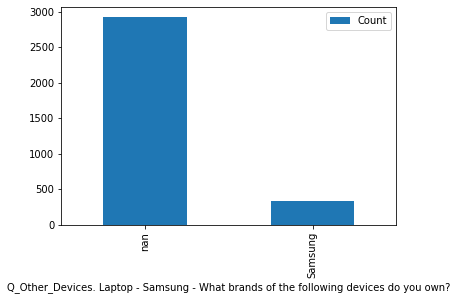

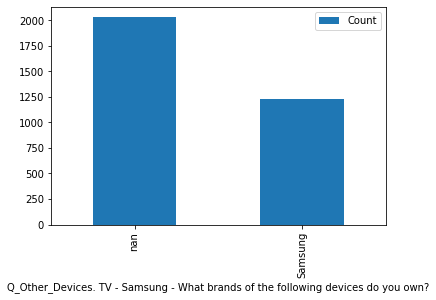

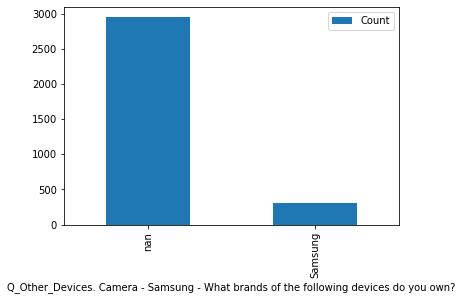

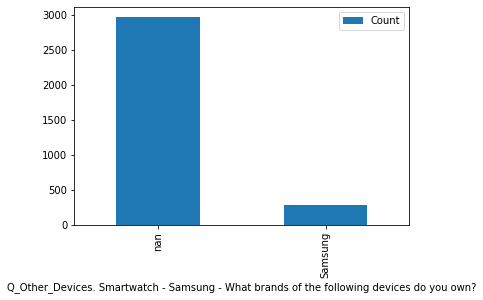

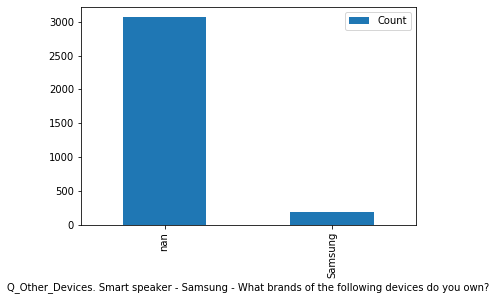

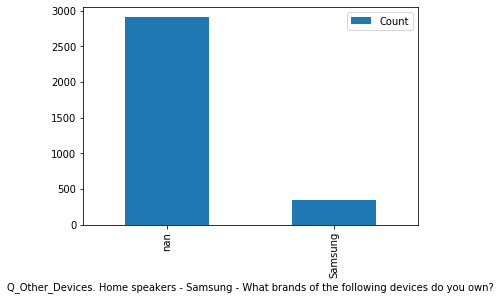

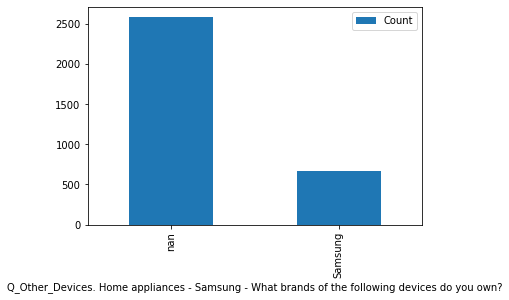

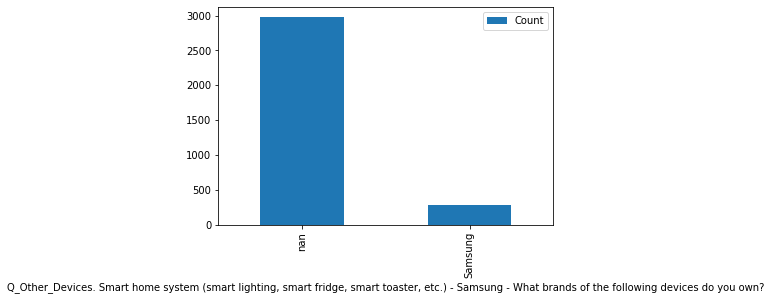

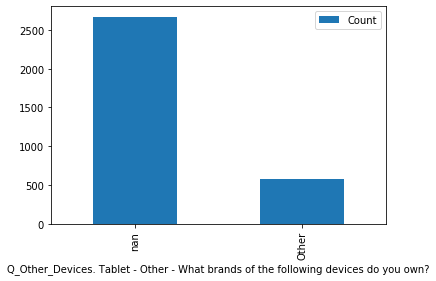

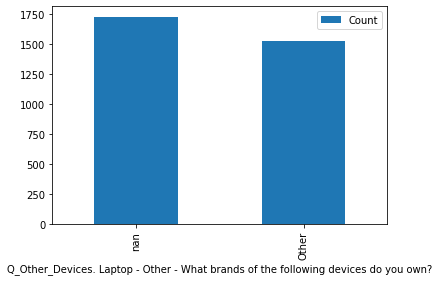

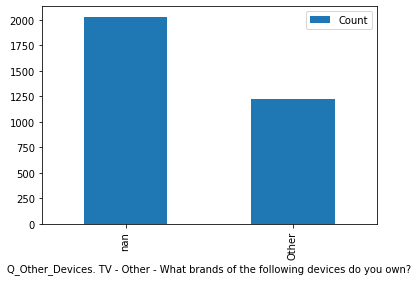

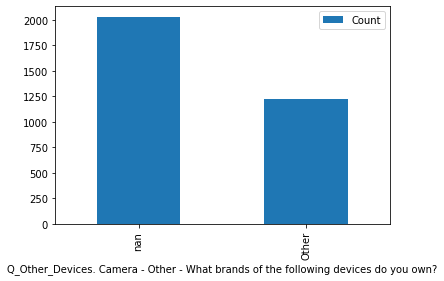

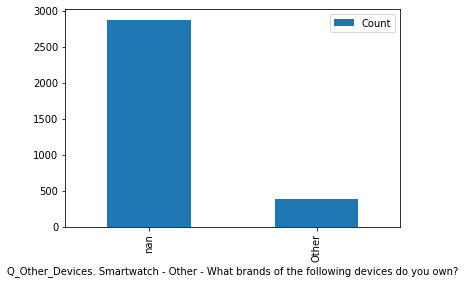

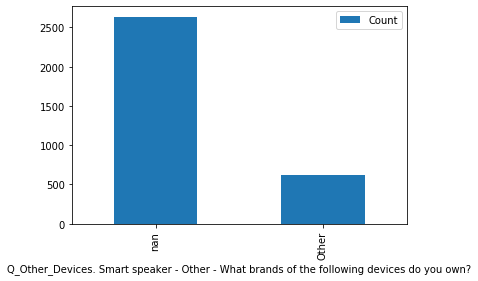

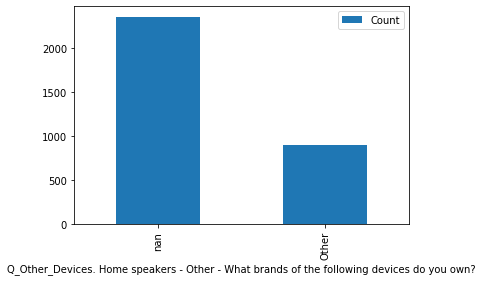

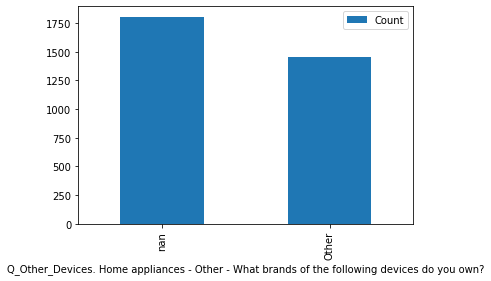

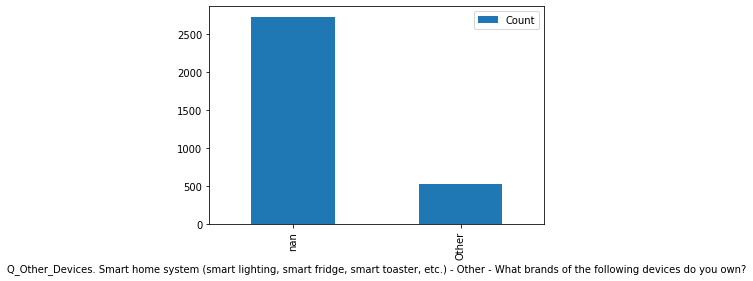

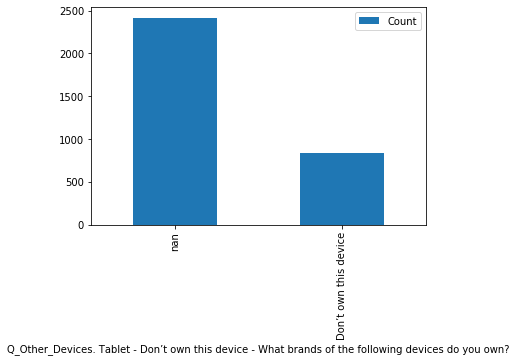

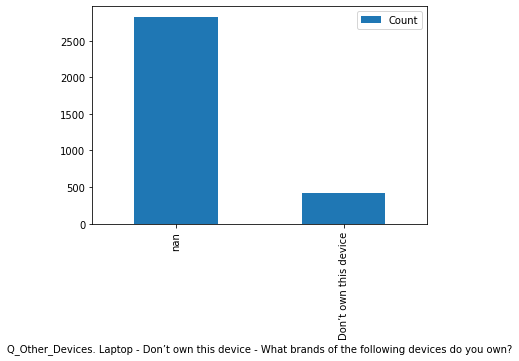

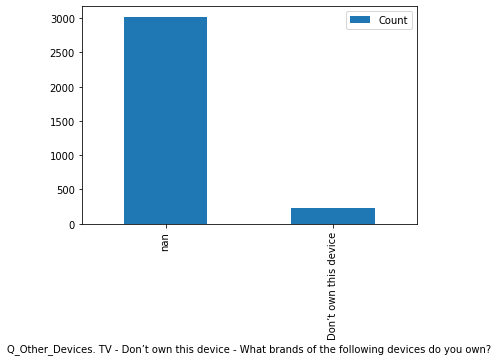

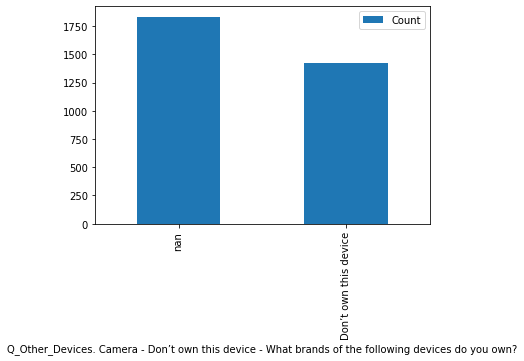

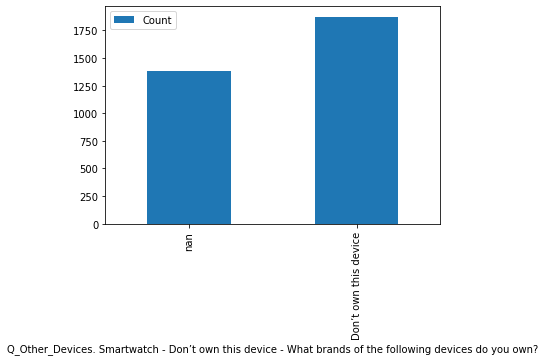

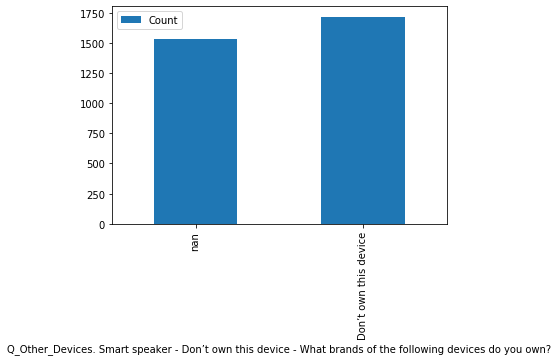

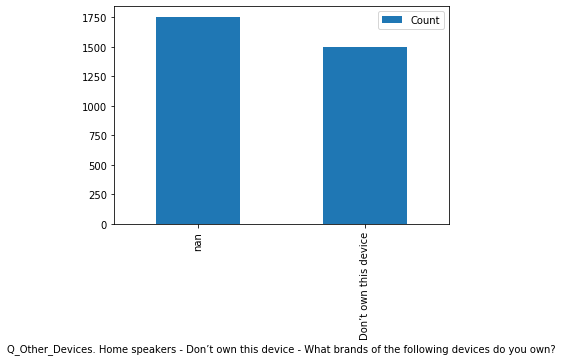

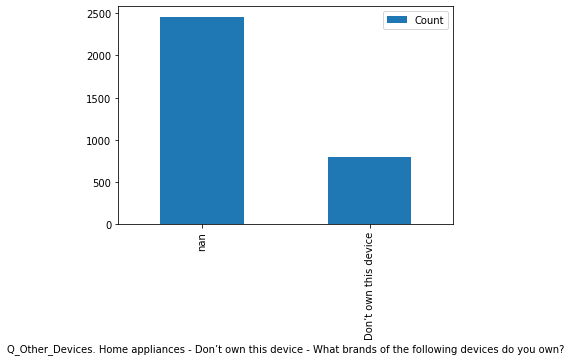

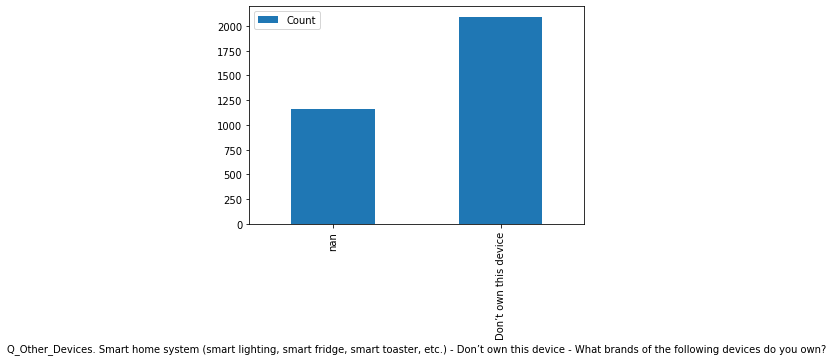

In [379]:
for VAR in [VAR+'_'+str(y) for y in range(1,7) 
            for VAR in ['qxotherxdevices_'+str(x) for x in range(1,10)] ]:
    LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
    demog_summ_1d (df_data, VAR, LABEL, 90)

In [ ]:
Brand of previous smartphone
qxpreviousxbrand

AxesSubplot(0.125,0.125;0.775x0.755)


,Q_Previous_Brand. Which smartphone brand did you use before [MODEL]?,Count,Prop
0,Apple iPhone,1178,0.362016
1,Samsung,1063,0.326675
2,LG,245,0.075292
3,Google,137,0.042102
4,Motorola,230,0.070682
5,HTC,98,0.030117
6,ZTE,51,0.015673
7,Alcatel,20,0.006146
8,Huawei,19,0.005839
9,Sony,60,0.018439


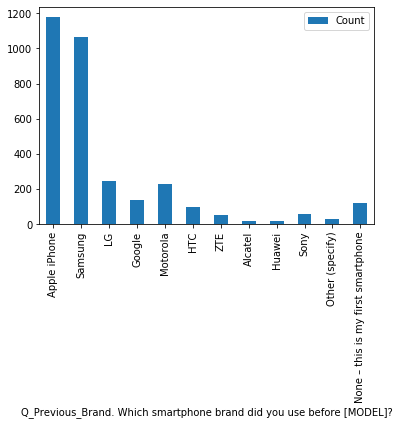

In [380]:
VAR = "qxpreviousxbrand"
LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
demog_summ_1d (df_data, VAR, LABEL, 90)

Label_y                             Apple  Google     LG  Motorola  Samsung
Label_x                                                                    
Alcatel                               7.0     4.0    1.0       1.0      7.0
Apple iPhone                        914.0    82.0   77.0      23.0     82.0
Google                               13.0    74.0   15.0       5.0     30.0
HTC                                  11.0    29.0   20.0      16.0     22.0
Huawei                                1.0     6.0    4.0       1.0      7.0
LG                                   46.0    44.0   71.0      23.0     61.0
Motorola                             26.0    59.0   62.0      34.0     49.0
None – this is my first smartphone   67.0     7.0   17.0       9.0     21.0
Other (specify)                      17.0     9.0    1.0       NaN      5.0
Samsung                             145.0   136.0  146.0      45.0    591.0
Sony                                  7.0     9.0   19.0      15.0     10.0
ZTE         

,Label_x,Label_y,respid
0,Apple iPhone,Samsung,82
1,Apple iPhone,Apple,914
2,Apple iPhone,LG,77
3,Apple iPhone,Google,82
4,Apple iPhone,Motorola,23
5,Samsung,Samsung,591
6,Samsung,Apple,145
7,Samsung,LG,146
8,Samsung,Google,136
9,Samsung,Motorola,45


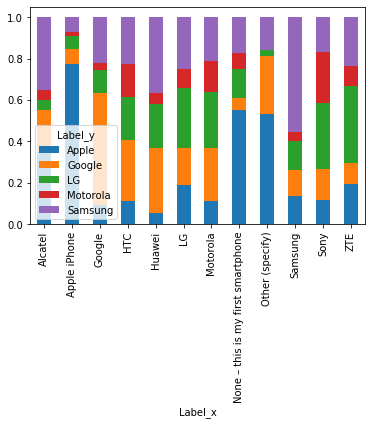

In [383]:
demog_summ_2d (df_data, VAR, LABEL=LABEL)

In [ ]:
Ease of transferring settings, contacts and content to a new smartphone
qxtransition_1

AxesSubplot(0.125,0.125;0.775x0.755)


,"Q_Current_OS. Which version of [SHOW IF BRAND=APPLE: iOS; SHOW IF BRAND = SAMSUNG, LG, MOTOROLA, GOOGLE: Android] are you currently using on your smartphone? If you are not sure, you can check this in your settings.",Count,Prop
0,Android 7.0,103,0.031653
1,Android 7.1,123,0.037800
2,Android 8.0,314,0.096497
3,Android 8.1,326,0.100184
4,Android 9.0,702,0.215734
5,iOS 10,110,0.033805
6,iOS 11,166,0.051014
7,iOS 12,745,0.228949
8,Other (specify),19,0.005839
9,Don’t know,646,0.198525


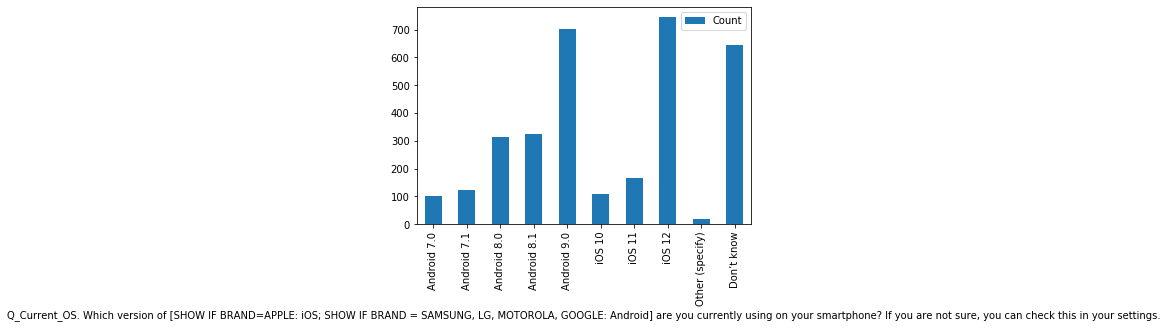

In [384]:
VAR = "qxcurrentxos"
LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
demog_summ_1d (df_data, VAR, LABEL, 90)

In [ ]:
Main reasons for purchasing a new smartphone/upgrading
qxupgrade01_1 to qxupgrade01_9

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


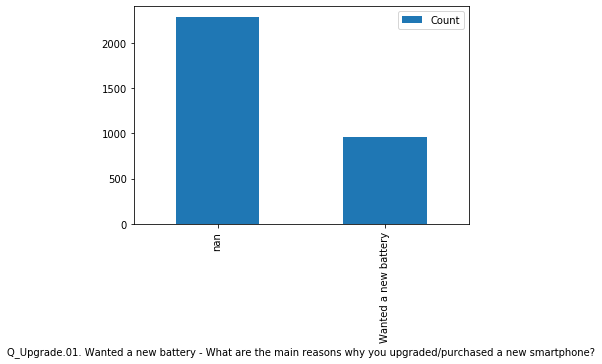

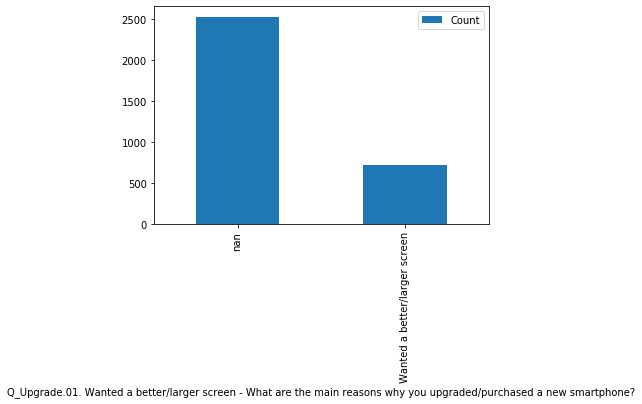

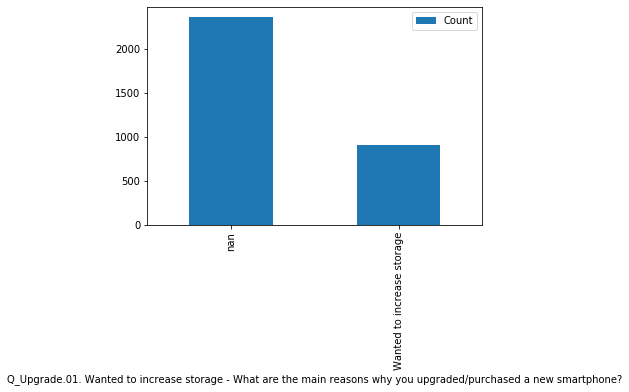

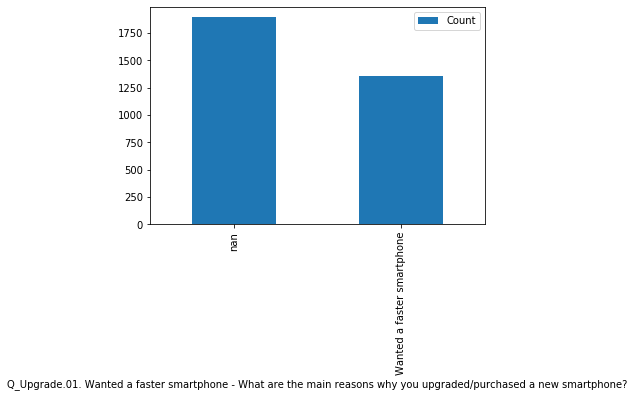

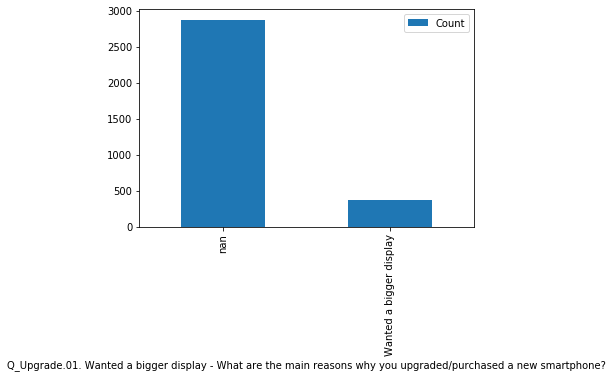

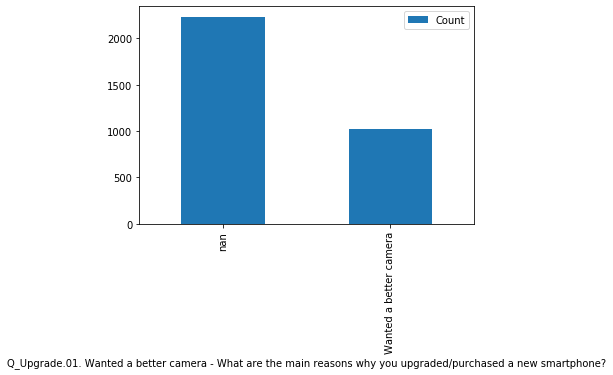

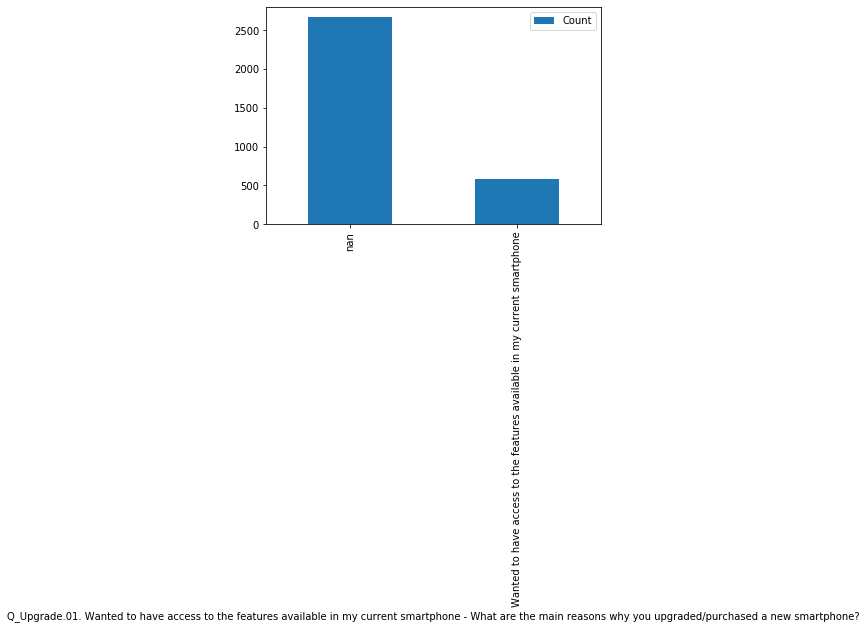

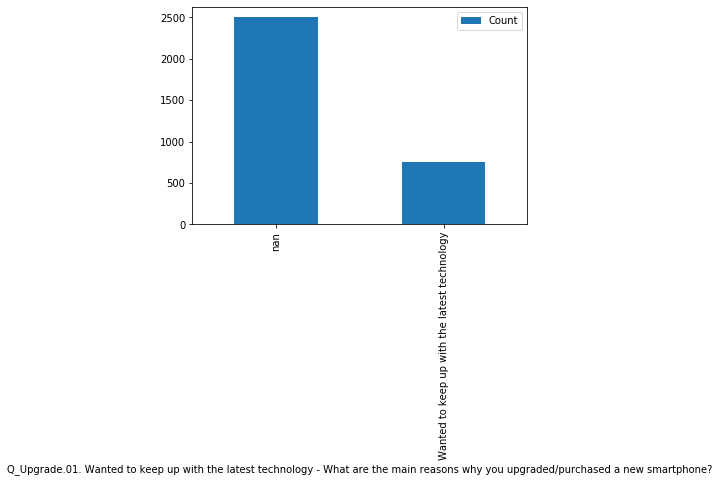

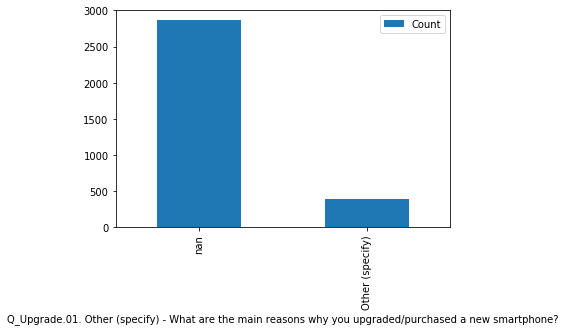

In [386]:
for VAR in ['qxupgrade01_'+str(x) for x in range(1,10)]:
    LABEL = df_varmap[df_varmap.Variable==VAR]['Label'].iloc[0]
    demog_summ_1d (df_data, VAR, LABEL, 90)

# Response Variables
UX_Loyalty: UX_Loyalty = float (min: 1, max: 7) - UX loyalty
UXindex

AxesSubplot(0.125,0.125;0.775x0.755)


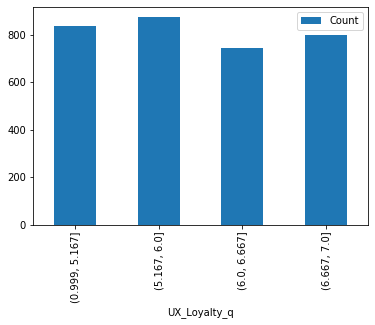

In [404]:
# UX_Loyalty = float (min: 1, max: 7) - UX loyalty
df_data['UX_Loyalty_q'] = pd.qcut(df_data['UX_Loyalty'], 4)
df = df_data.groupby(['UX_Loyalty_q'])['respid'].count().to_frame().reset_index()
df.columns = ['UX_Loyalty_q',"Count"]
df['Prop'] = df['Count'].transform(lambda x: x/x.sum())
print(df.plot.bar(x='UX_Loyalty_q', y='Count'))

In [427]:
df_bl = df_data.groupby("hbrand")["UX_Loyalty"].describe( percentiles = [ 0.5, .67, .75,0.9 ] )
df_bl.merge(df_valmap[df_valmap.key=='hbrand'],  
                         left_on='hbrand', right_on="id", how='left')

,count,mean,std,min,50%,67%,75%,90%,max,key,id,Label
0,897.0,6.091044,0.891572,1.000000,6.333333,6.666667,7.000000,7.0,7.0,hbrand,1,Samsung
1,1264.0,5.982199,0.994161,1.000000,6.166667,6.666667,6.833333,7.0,7.0,hbrand,2,Apple
2,452.0,5.405605,1.078212,1.333333,5.333333,6.000000,6.000000,7.0,7.0,hbrand,3,LG
3,464.0,5.905891,1.102500,1.000000,6.166667,6.666667,6.833333,7.0,7.0,hbrand,4,Google
4,177.0,5.219397,1.026194,2.500000,5.000000,5.666667,6.000000,6.9,7.0,hbrand,5,Motorola


AxesSubplot(0.125,0.125;0.775x0.755)


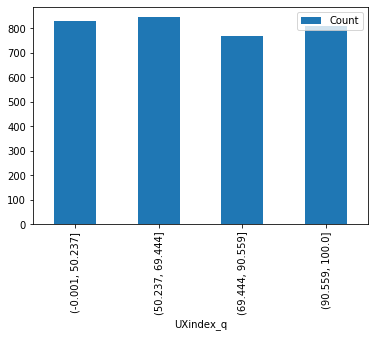

In [403]:
# UXindex = float (min: 0, max: 100) - UX Index
df_data['UXindex_q'] = pd.qcut(df_data['UXindex'], 4)
df = df_data.groupby(['UXindex_q'])['respid'].count().to_frame().reset_index()
df.columns = ['UXindex_q',"Count"]
df['Prop'] = df['Count'].transform(lambda x: x/x.sum())
print(df.plot.bar(x='UXindex_q', y='Count'))

In [430]:
df_bux = df_data.groupby("hbrand")["UXindex"].describe( percentiles = [ 0.5, .67, .75,0.9 ] )
df_bux.merge(df_valmap[df_valmap.key=='hbrand'],  
                         left_on='hbrand', right_on="id", how='left')

,count,mean,std,min,50%,67%,75%,90%,max,key,id,Label
0,897.0,71.846334,23.850564,0.000000,74.900382,85.704969,91.754658,100.000000,100.0,hbrand,1,Samsung
1,1264.0,69.971556,24.091126,0.000000,72.180339,83.864025,91.381571,100.000000,100.0,hbrand,2,Apple
2,452.0,59.669380,23.156546,0.177355,61.616189,69.444444,75.648365,91.754658,100.0,hbrand,3,LG
3,464.0,69.975810,23.589987,0.177355,74.731858,83.507357,91.381571,100.000000,100.0,hbrand,4,Google
4,177.0,59.241793,21.250687,4.701415,60.056773,69.444444,69.444444,90.559293,100.0,hbrand,5,Motorola
